# Notebook to extract the max of Specific heat

In [1]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
from isingchat import style
from isingchat.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


p-1.0_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


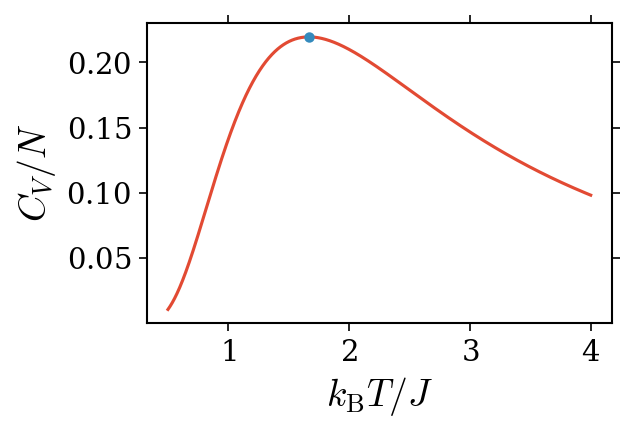

p-1.0_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.34116352
Temp. at C_V max.: 2.1089399


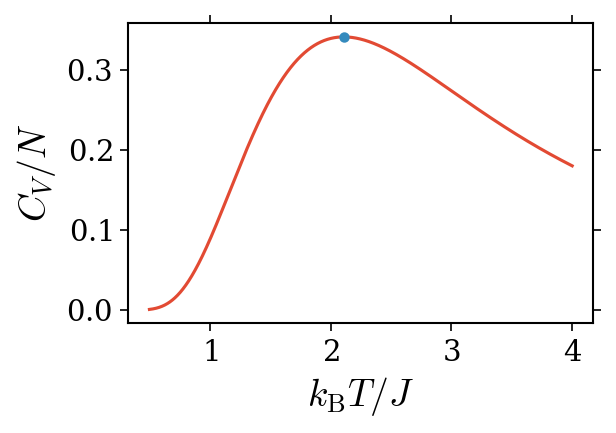

p-1.0_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42582295
Temp. at C_V max.: 2.457743


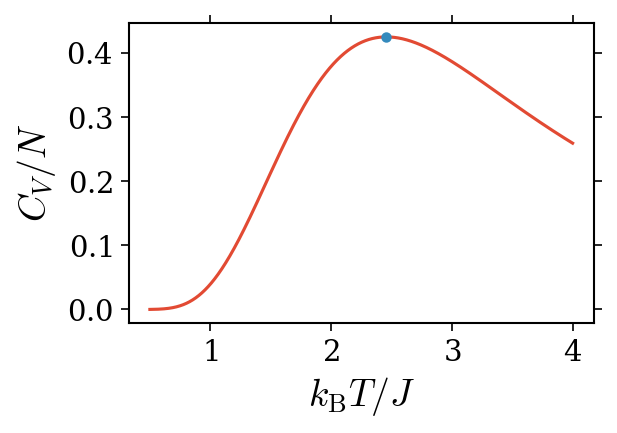

p-1.0_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.49090902
Temp. at C_V max.: 2.7484123


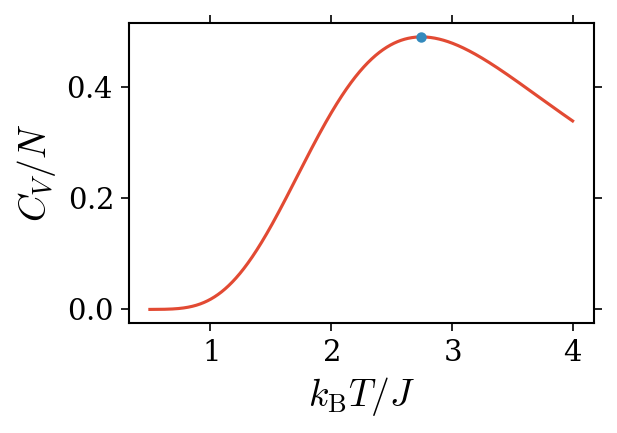

p-1.0_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.54378064
Temp. at C_V max.: 3.0014656


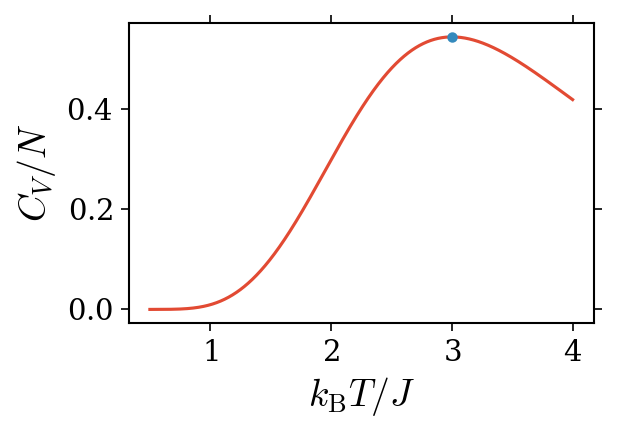

p-1.0_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.58826614
Temp. at C_V max.: 3.2254519


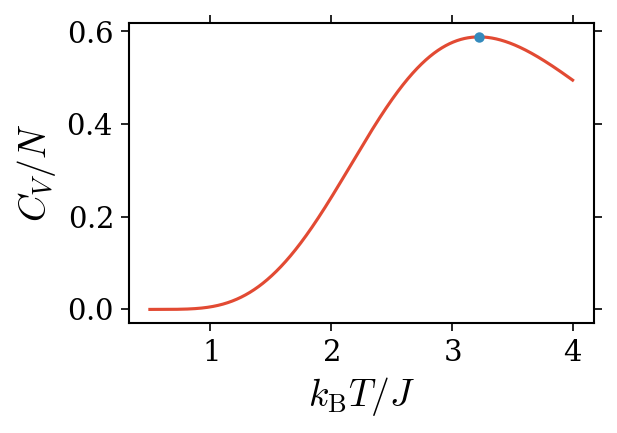

p-1.0_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.62662064
Temp. at C_V max.: 3.4272106


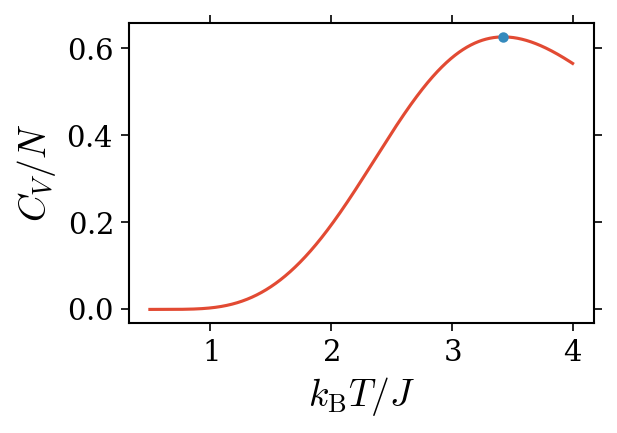

p-1.0_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.6597914
Temp. at C_V max.: 3.6101612


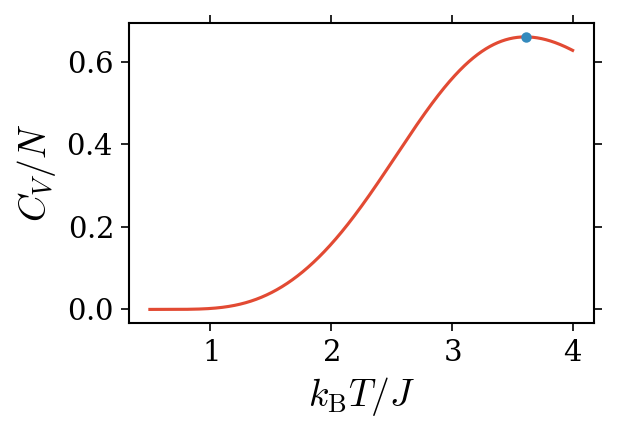

p-1.0_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.69007845
Temp. at C_V max.: 3.7777235


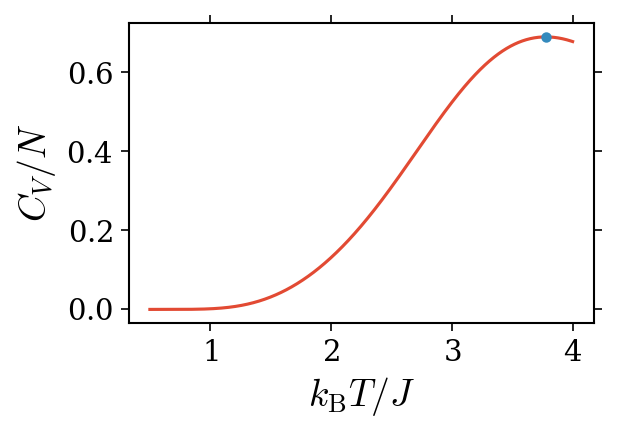

p-1.0_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.71722243
Temp. at C_V max.: 3.9352868


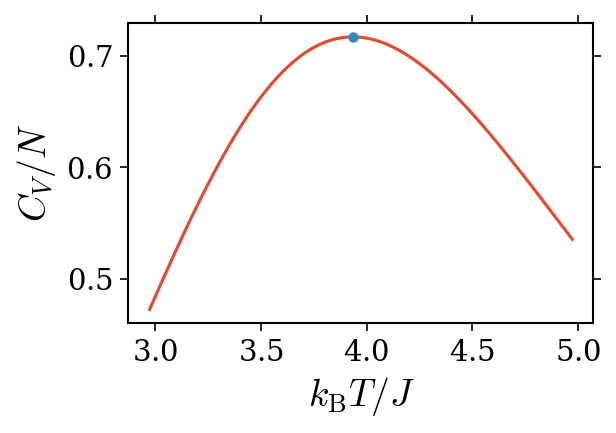

p-1.0_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\p-1.0_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.74170689
Temp. at C_V max.: 4.0809669


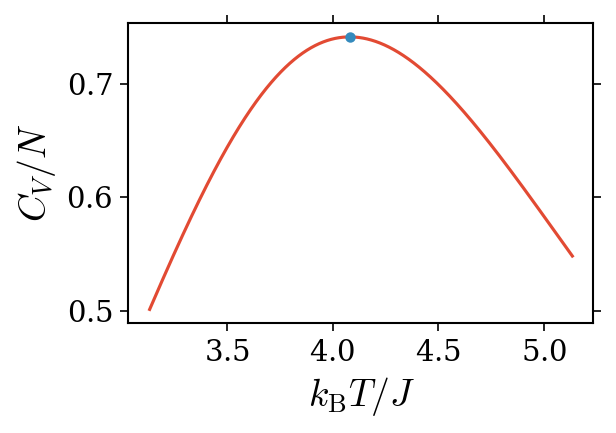

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.0\exp_p-1.0_all_eigs_max_cv.csv
p-1.05_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


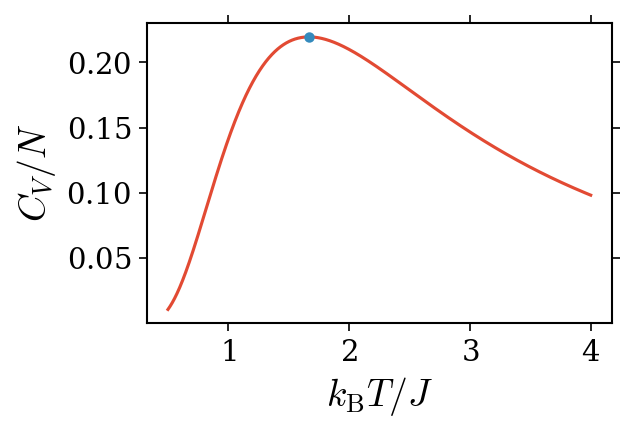

p-1.05_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.34116352
Temp. at C_V max.: 2.0850024


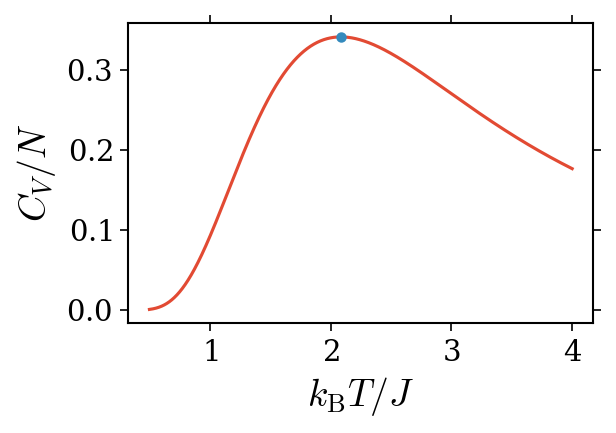

p-1.05_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42573891
Temp. at C_V max.: 2.4098681


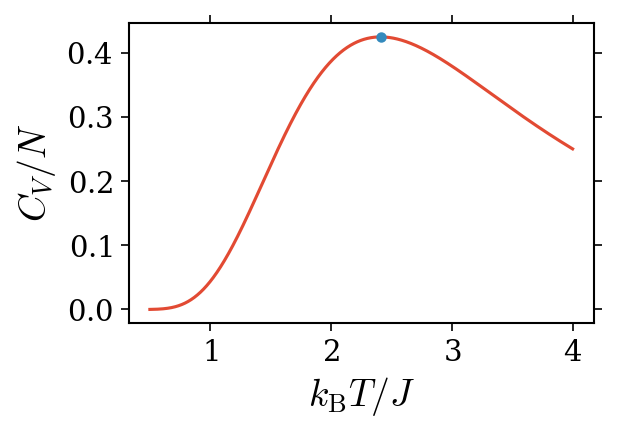

p-1.05_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.4907152
Temp. at C_V max.: 2.6783097


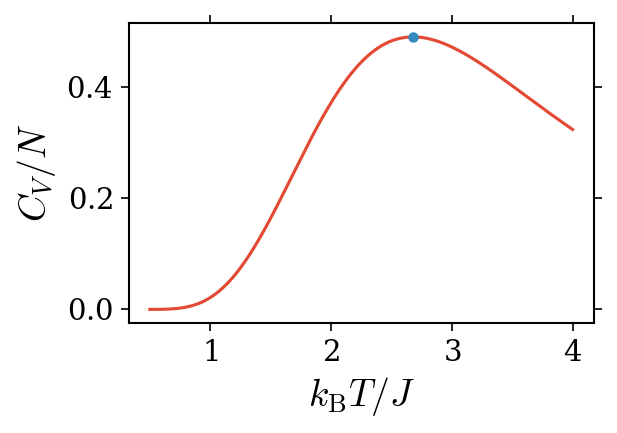

p-1.05_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.54347939
Temp. at C_V max.: 2.9091353


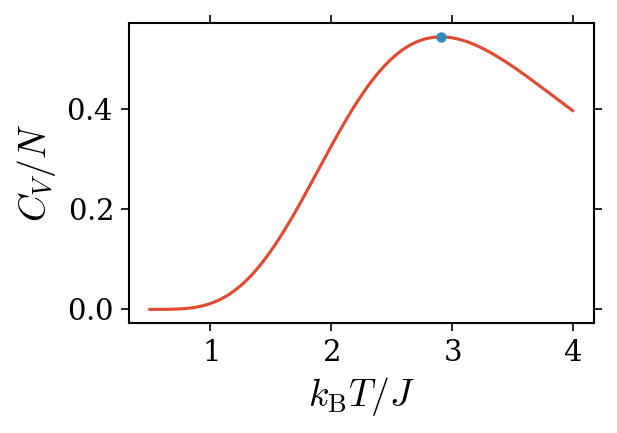

p-1.05_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.58787128
Temp. at C_V max.: 3.1126038


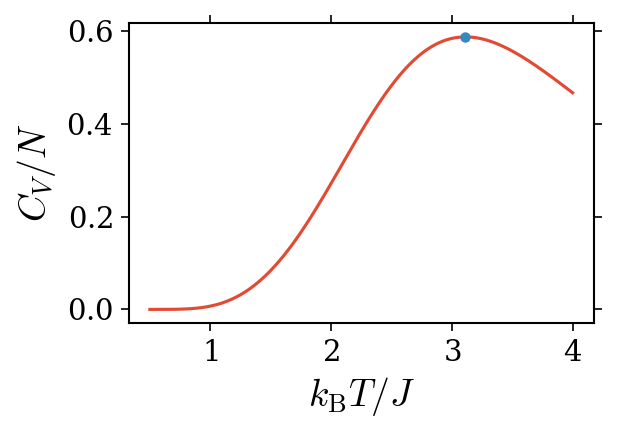

p-1.05_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.62614931
Temp. at C_V max.: 3.2955545


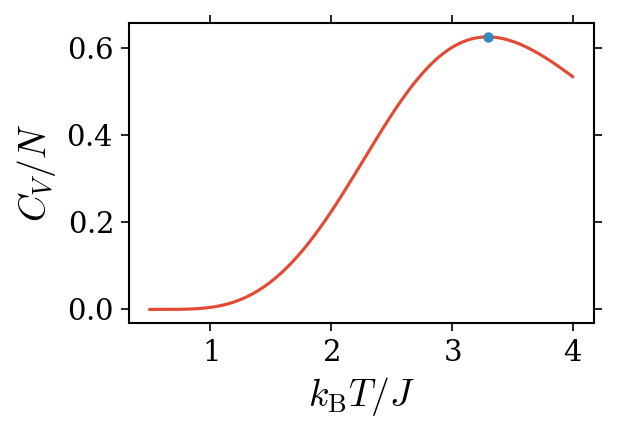

p-1.05_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.6597588
Temp. at C_V max.: 3.4596971


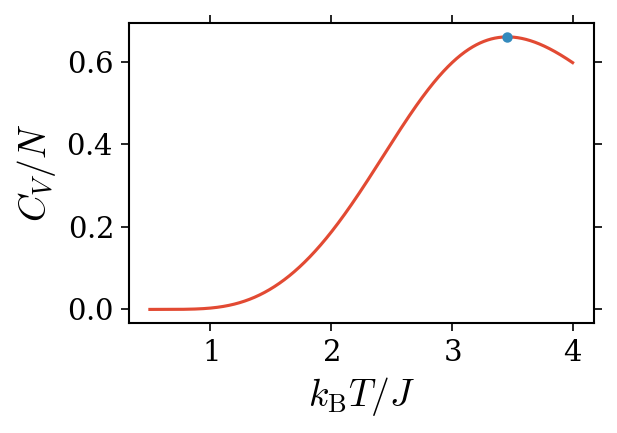

p-1.05_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.68968241
Temp. at C_V max.: 3.611871


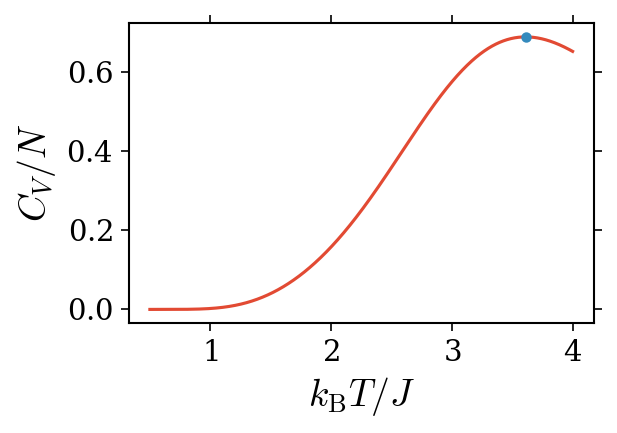

p-1.05_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.71662045
Temp. at C_V max.: 3.7509769


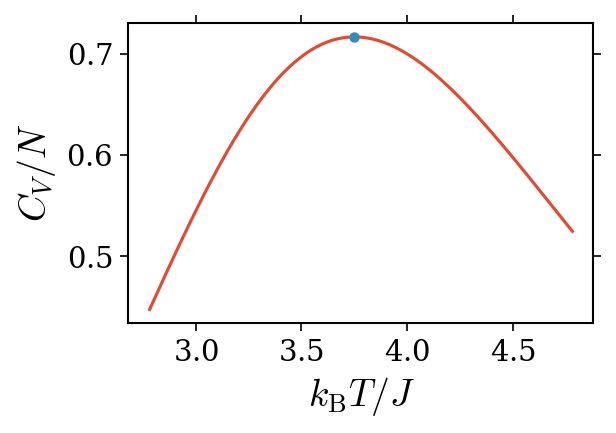

p-1.05_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\p-1.05_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.74108954
Temp. at C_V max.: 3.8804391


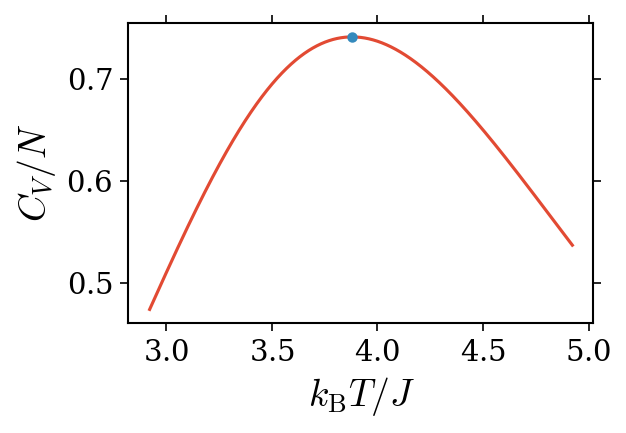

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.05\exp_p-1.05_all_eigs_max_cv.csv
p-1.1_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


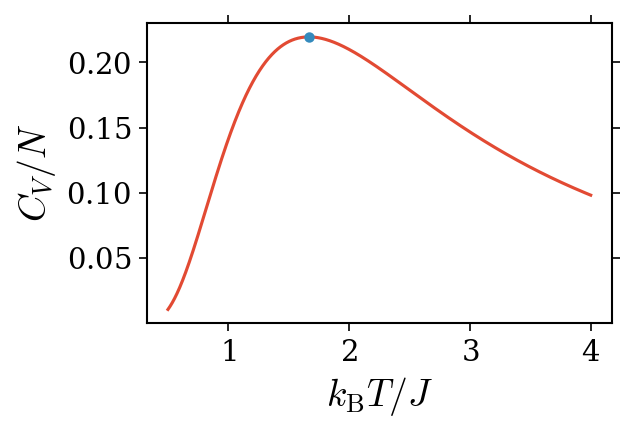

p-1.1_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.34116341
Temp. at C_V max.: 2.061065


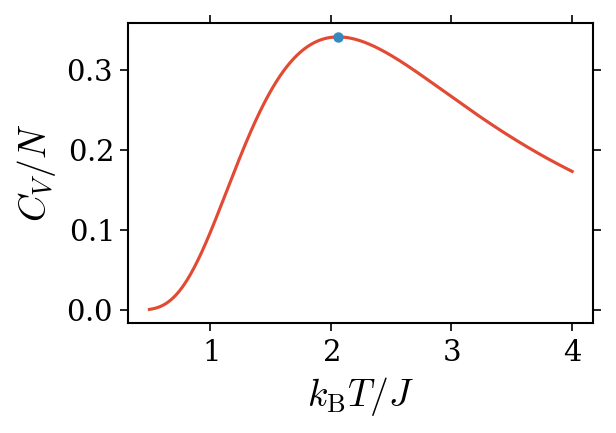

p-1.1_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42564901
Temp. at C_V max.: 2.363703


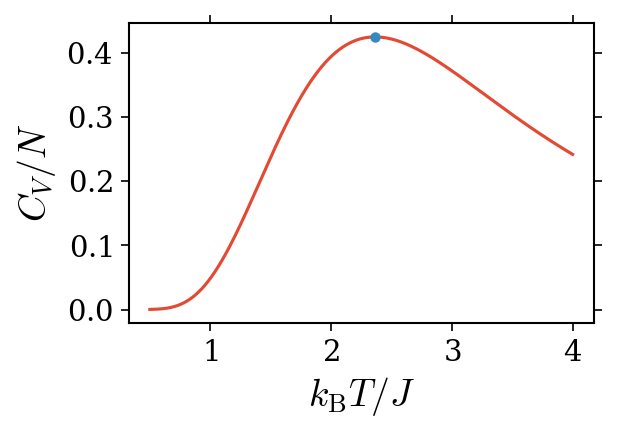

p-1.1_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.49050535
Temp. at C_V max.: 2.6116268


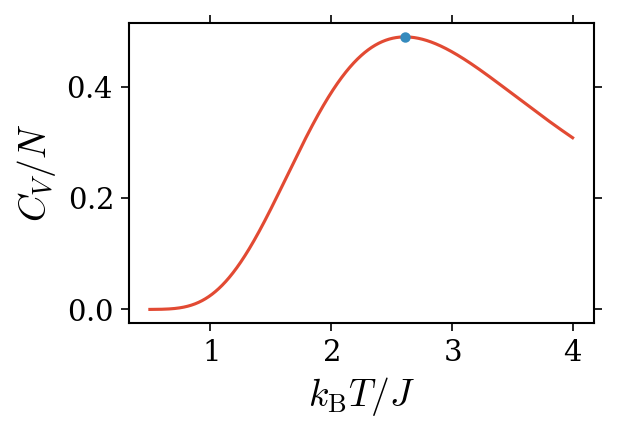

p-1.1_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.54314944
Temp. at C_V max.: 2.8236444


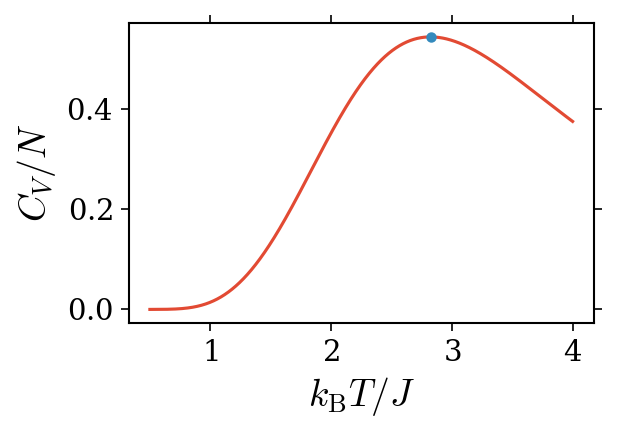

p-1.1_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.58743346
Temp. at C_V max.: 3.0083048


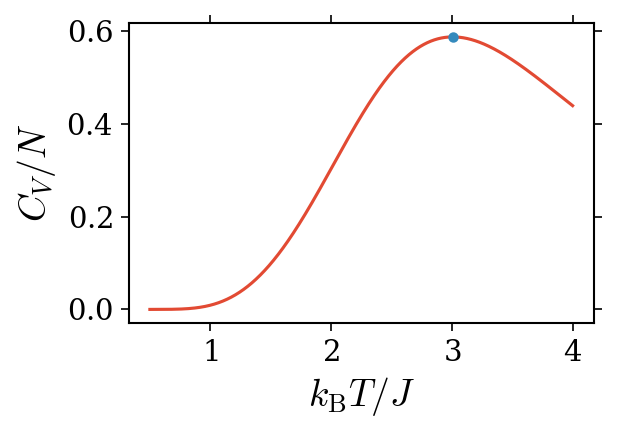

p-1.1_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.62562059
Temp. at C_V max.: 3.1724475


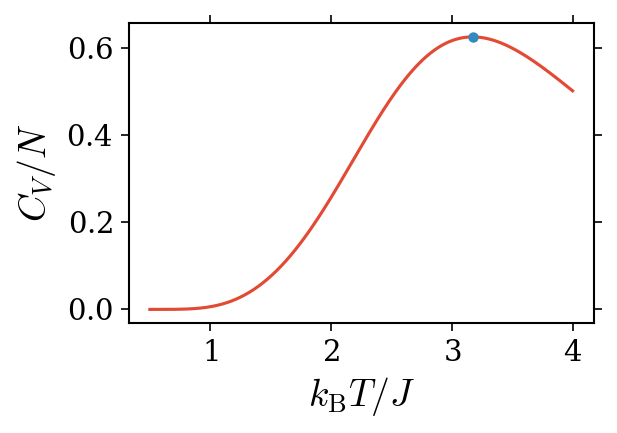

p-1.1_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.65915664
Temp. at C_V max.: 3.3194919


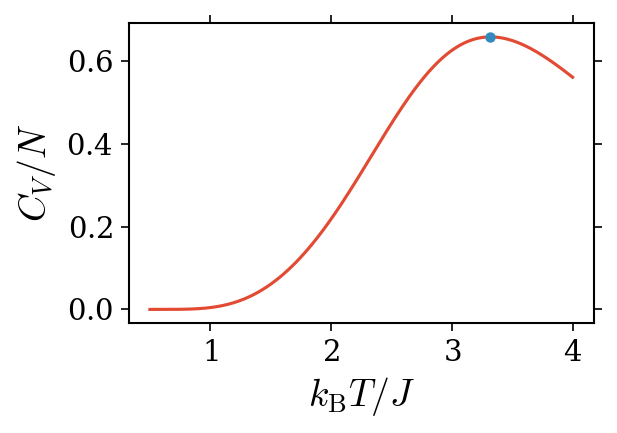

p-1.1_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.68902379
Temp. at C_V max.: 3.4545677


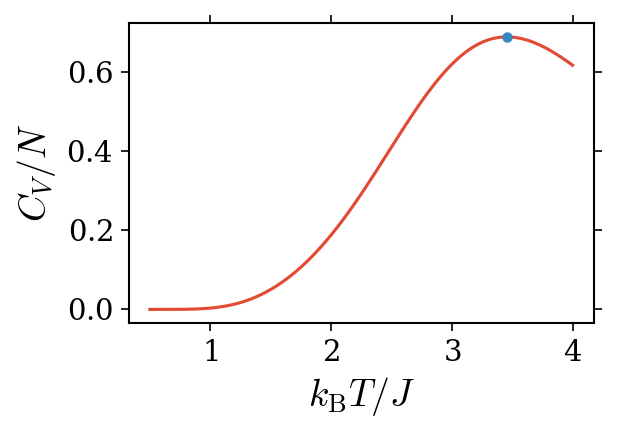

p-1.1_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.71592094
Temp. at C_V max.: 3.5798191


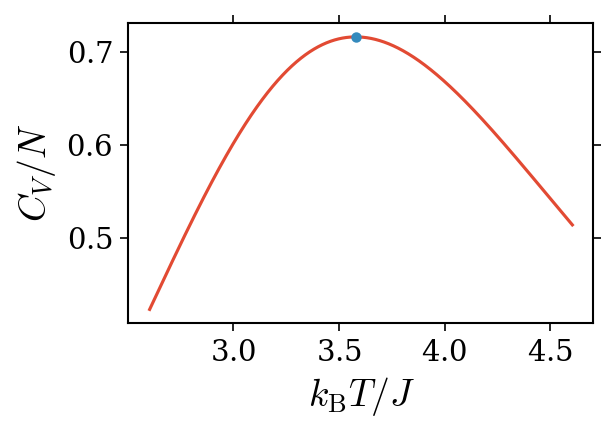

p-1.1_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\p-1.1_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.74036297
Temp. at C_V max.: 3.695321


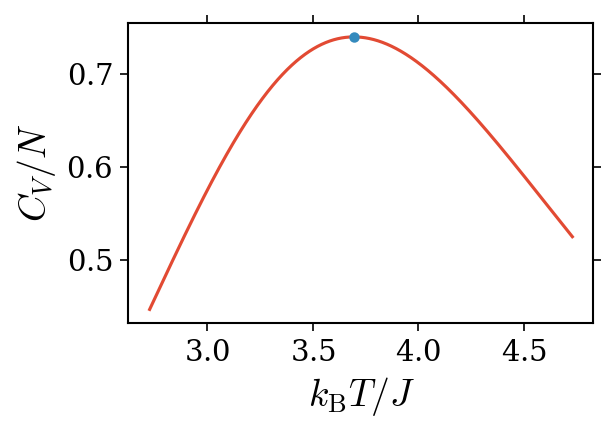

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.1\exp_p-1.1_all_eigs_max_cv.csv
p-1.2_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


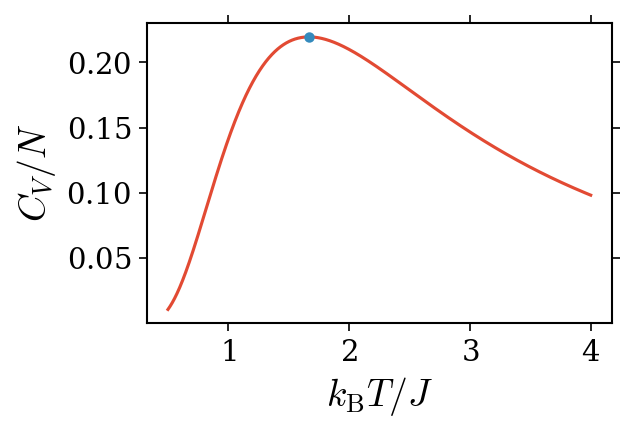

p-1.2_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.3411635
Temp. at C_V max.: 2.0183195


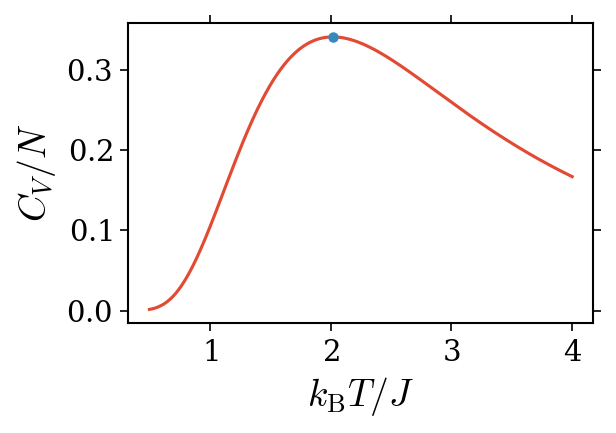

p-1.2_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.4254524
Temp. at C_V max.: 2.278212


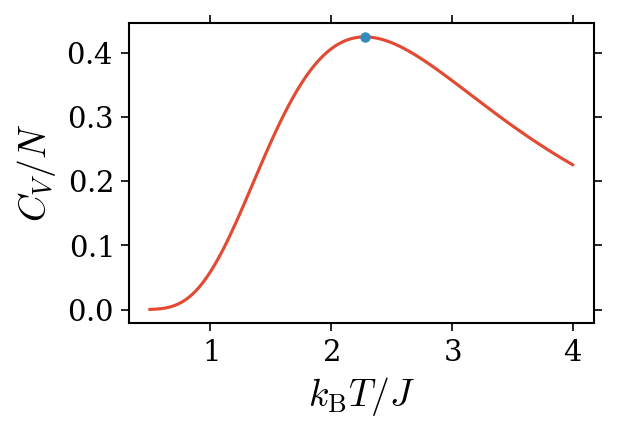

p-1.2_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.49003721
Temp. at C_V max.: 2.4885198


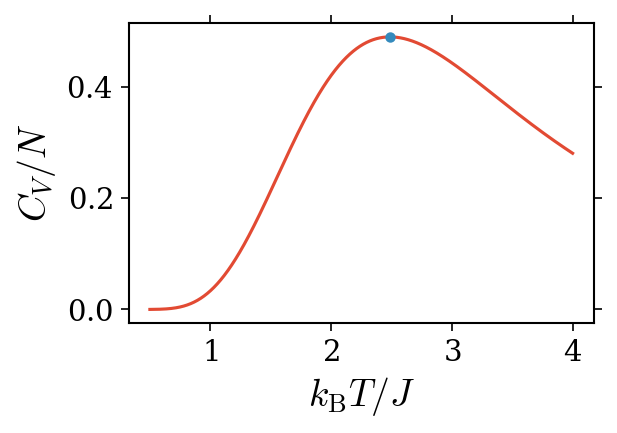

p-1.2_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.54240004
Temp. at C_V max.: 2.6629213


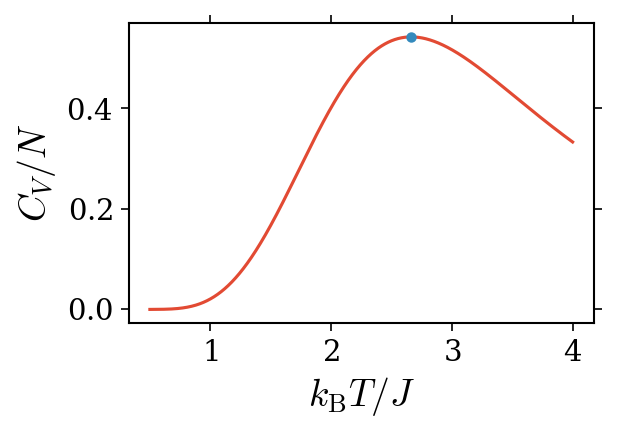

p-1.2_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.58642239
Temp. at C_V max.: 2.8150953


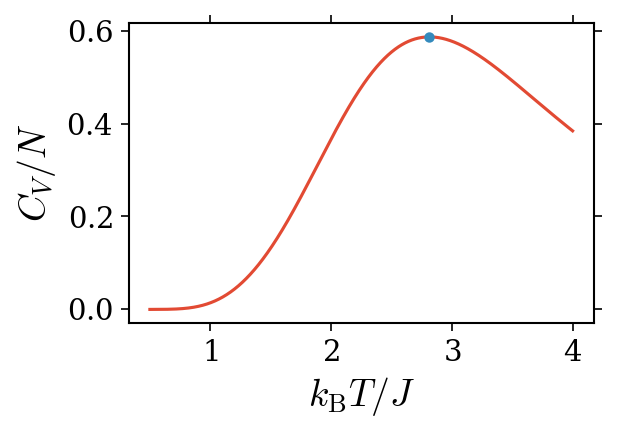

p-1.2_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.62437877
Temp. at C_V max.: 2.9484612


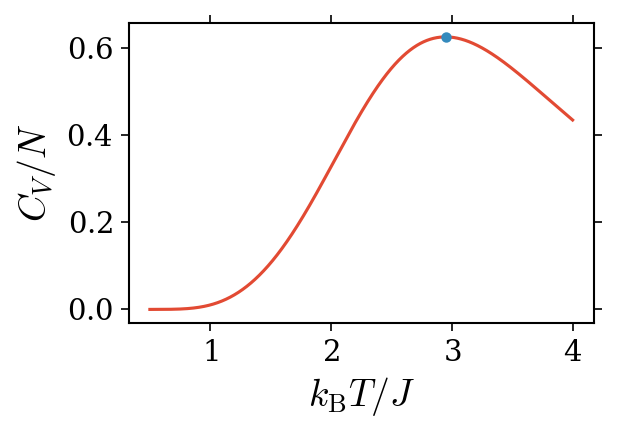

p-1.2_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.65731875
Temp. at C_V max.: 3.0664387


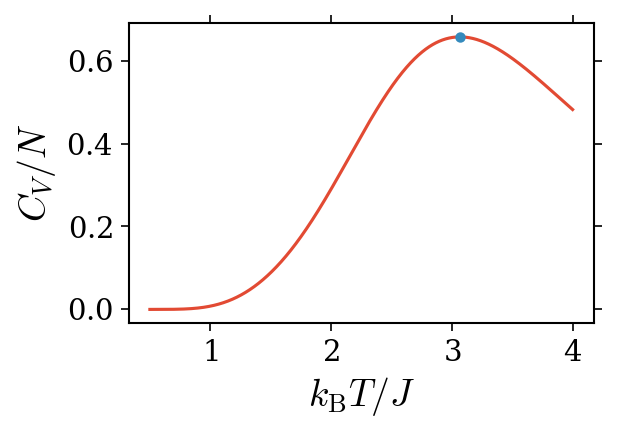

p-1.2_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.6872968
Temp. at C_V max.: 3.1741573


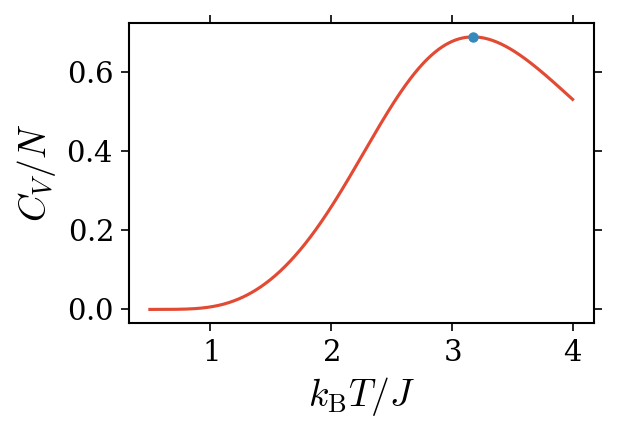

p-1.2_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.71419223
Temp. at C_V max.: 3.2726262


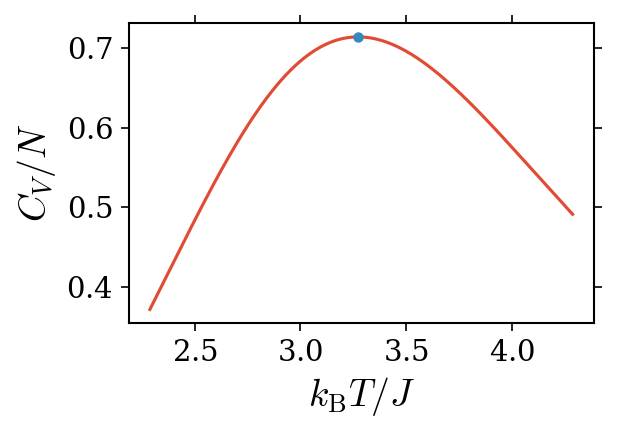

p-1.2_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\p-1.2_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.73853502
Temp. at C_V max.: 3.3634232


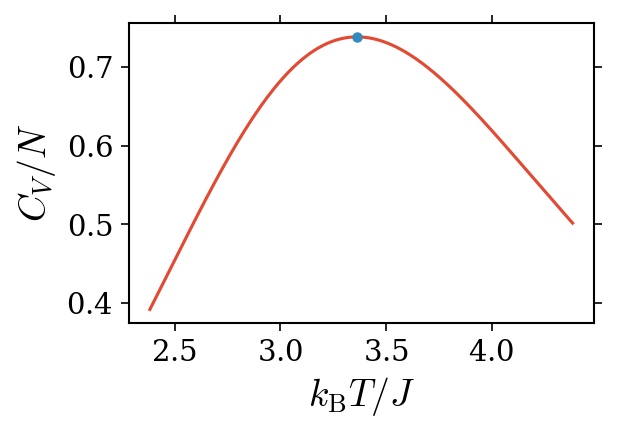

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.2\exp_p-1.2_all_eigs_max_cv.csv
p-1.3_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


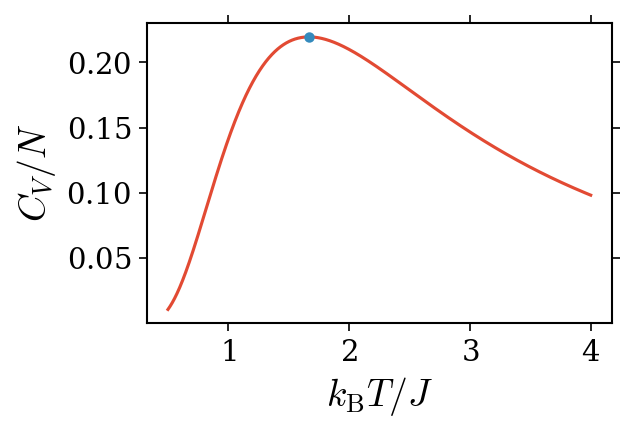

p-1.3_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.3411635
Temp. at C_V max.: 1.9772838


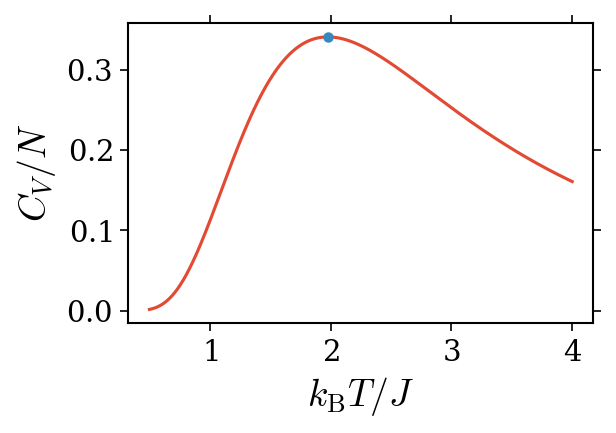

p-1.3_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.4252341
Temp. at C_V max.: 2.1995603


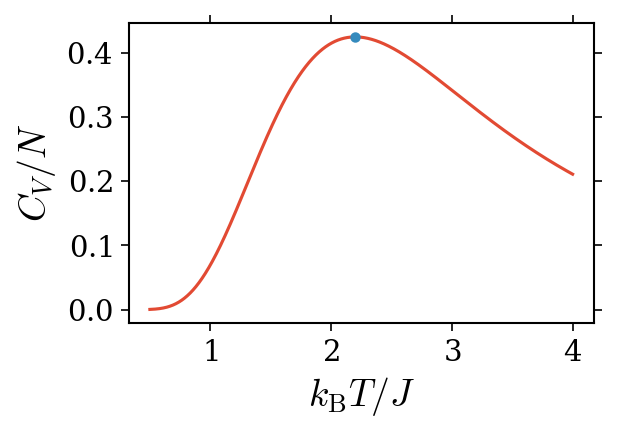

p-1.3_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.48950499
Temp. at C_V max.: 2.3756717


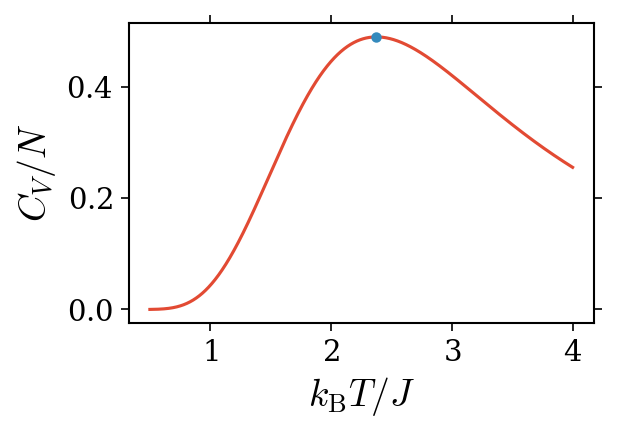

p-1.3_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.54152883
Temp. at C_V max.: 2.5210064


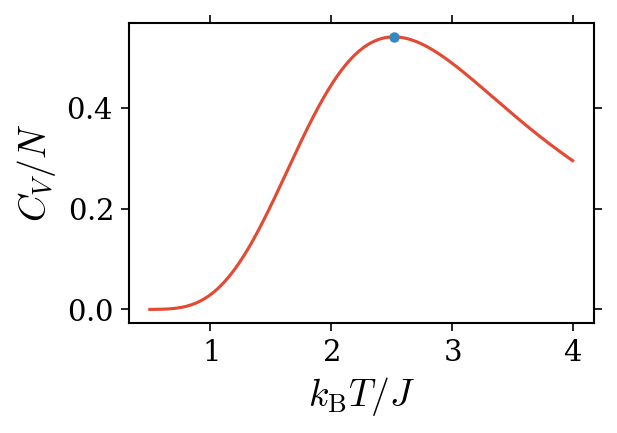

p-1.3_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.5852216
Temp. at C_V max.: 2.6424035


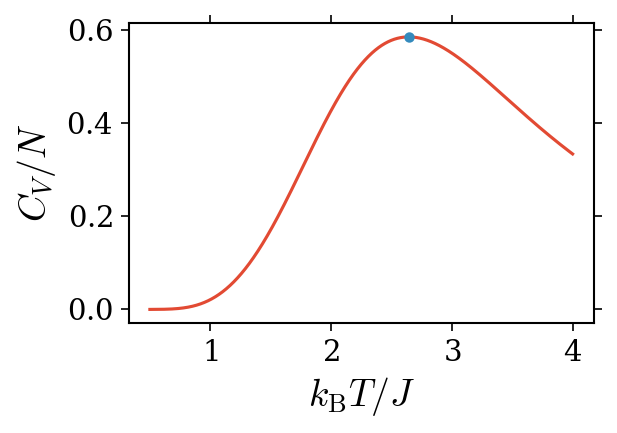

p-1.3_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.62287375
Temp. at C_V max.: 2.7501221


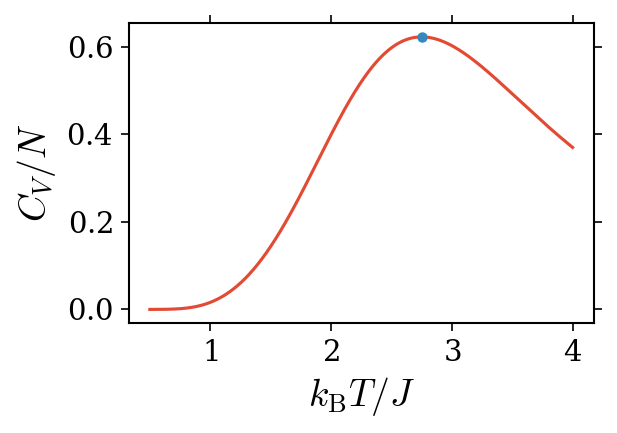

p-1.3_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.65594045
Temp. at C_V max.: 2.845872


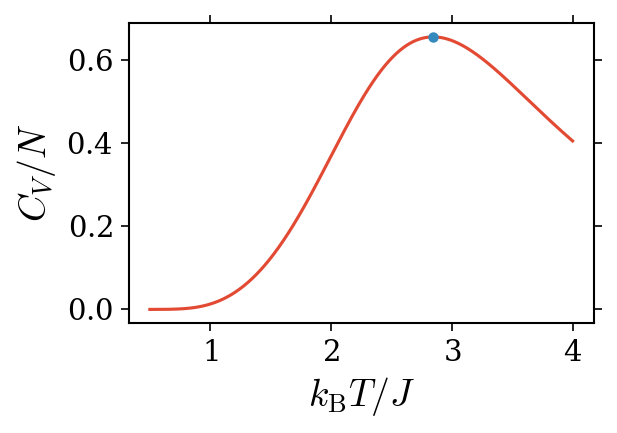

p-1.3_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.68540605
Temp. at C_V max.: 2.9296532


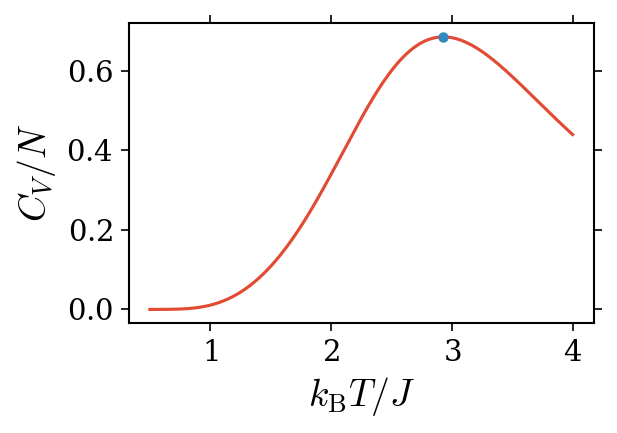

p-1.3_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.71196623
Temp. at C_V max.: 3.0075143


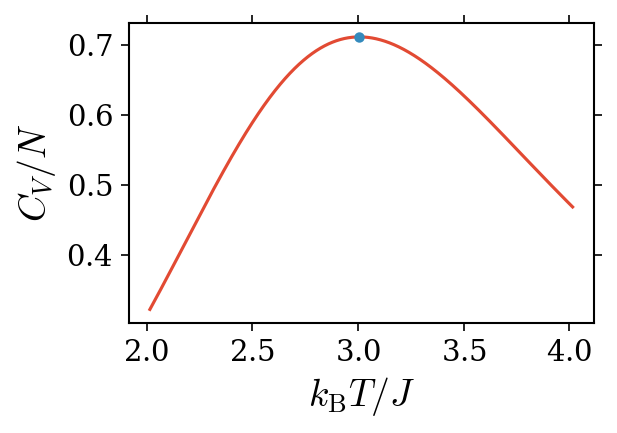

p-1.3_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\p-1.3_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.736132
Temp. at C_V max.: 3.0777991


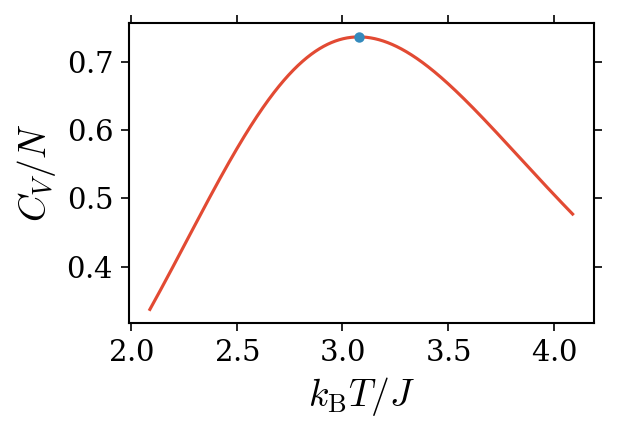

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.3\exp_p-1.3_all_eigs_max_cv.csv
p-1.4_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


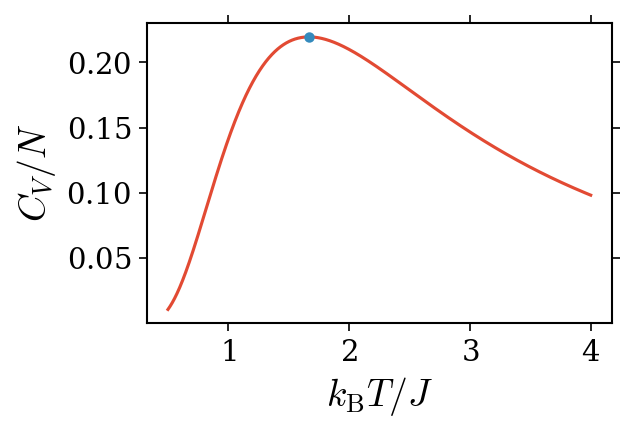

p-1.4_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.3411634
Temp. at C_V max.: 1.937958


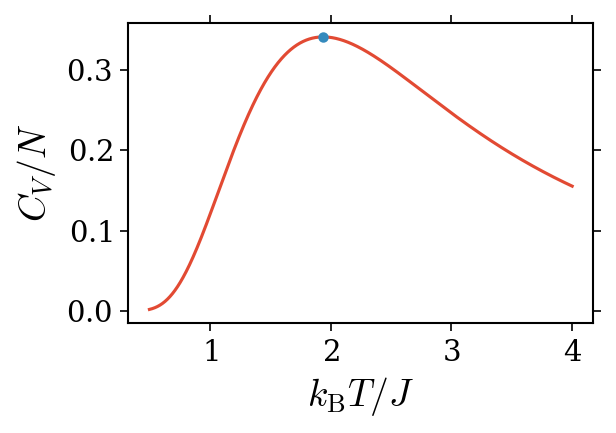

p-1.4_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42499585
Temp. at C_V max.: 2.1277479


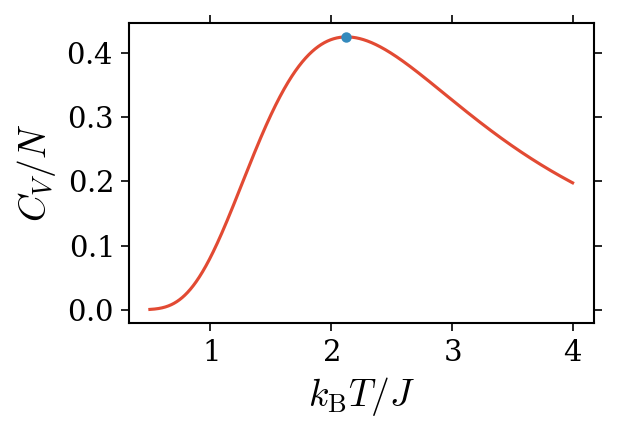

p-1.4_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.48891043
Temp. at C_V max.: 2.2730826


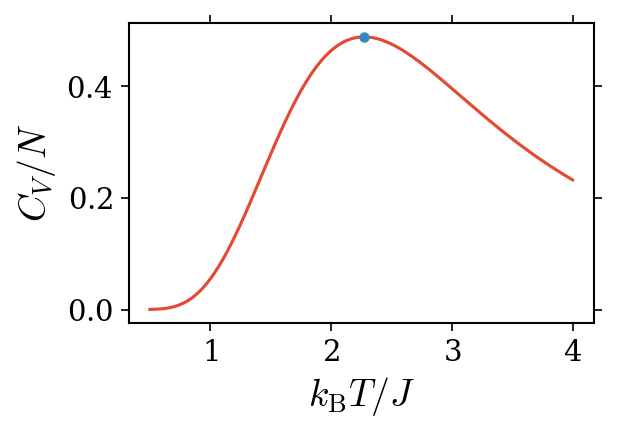

p-1.4_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.54053567
Temp. at C_V max.: 2.3910601


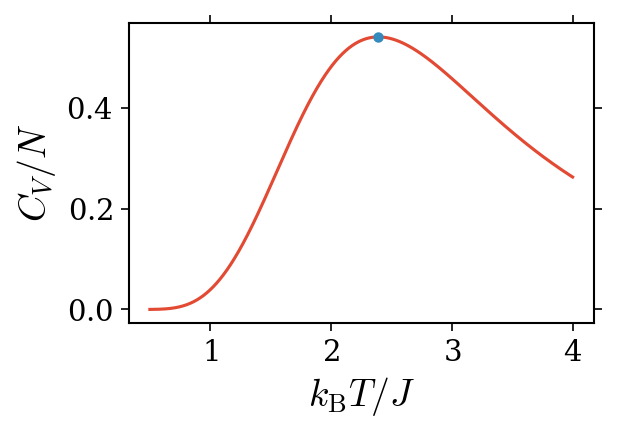

p-1.4_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.5838258
Temp. at C_V max.: 2.4902296


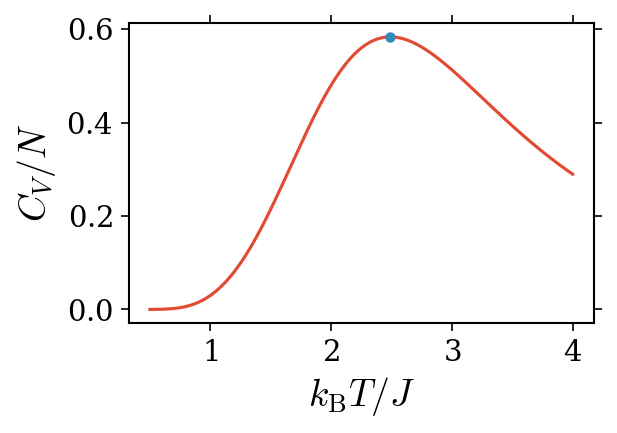

p-1.4_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.6210904
Temp. at C_V max.: 2.5757206


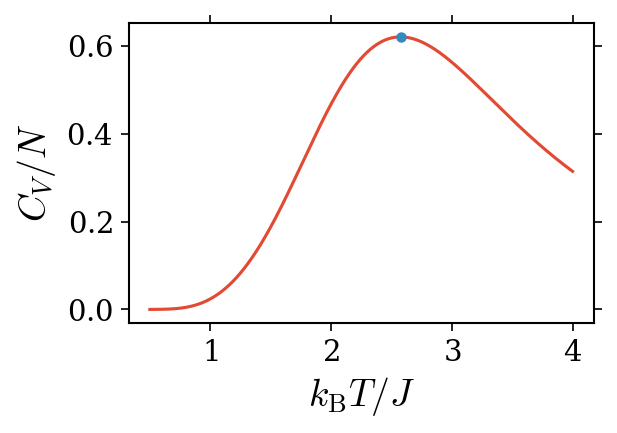

p-1.4_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.6537947
Temp. at C_V max.: 2.6492428


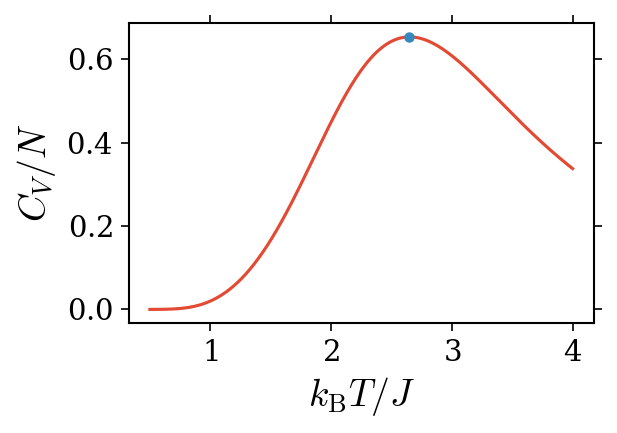

p-1.4_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.68292649
Temp. at C_V max.: 2.7159257


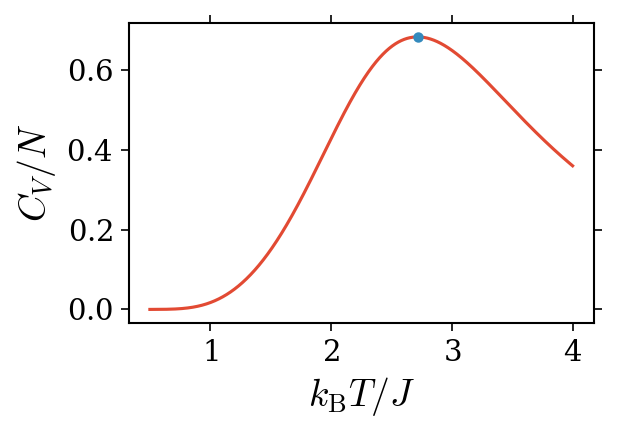

p-1.4_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.70918264
Temp. at C_V max.: 2.7760034


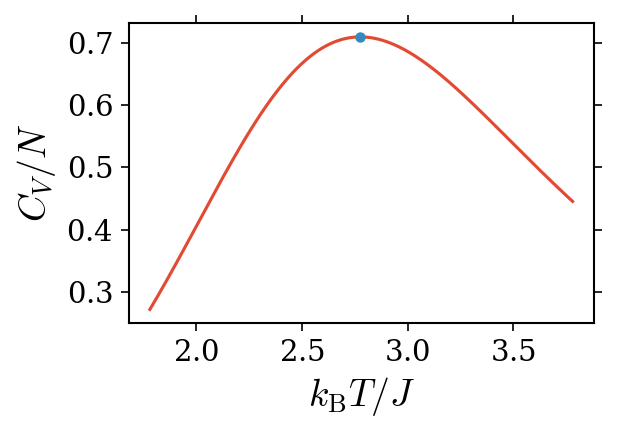

p-1.4_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\p-1.4_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.73307366
Temp. at C_V max.: 2.8304492


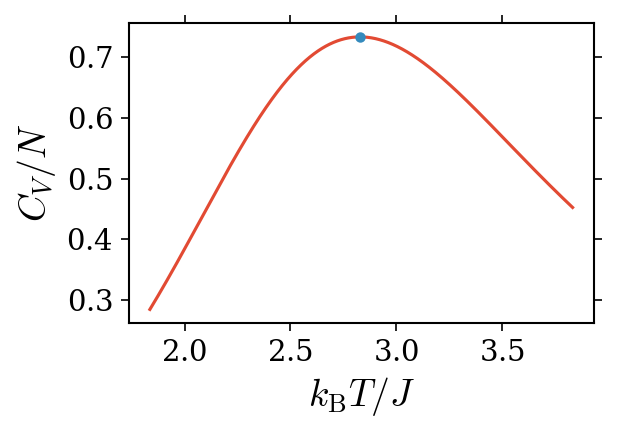

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.4\exp_p-1.4_all_eigs_max_cv.csv
p-1.5_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


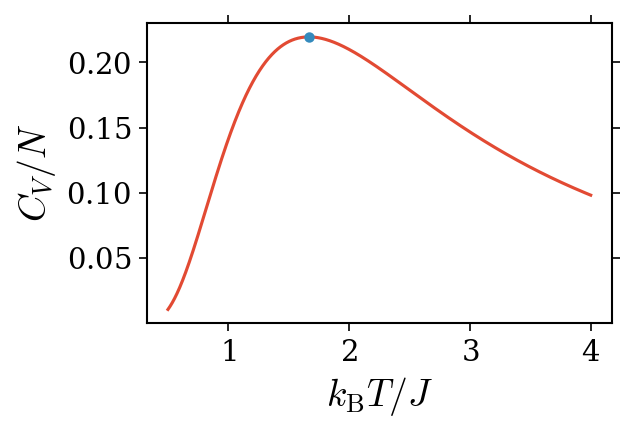

p-1.5_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.34116343
Temp. at C_V max.: 1.9037616


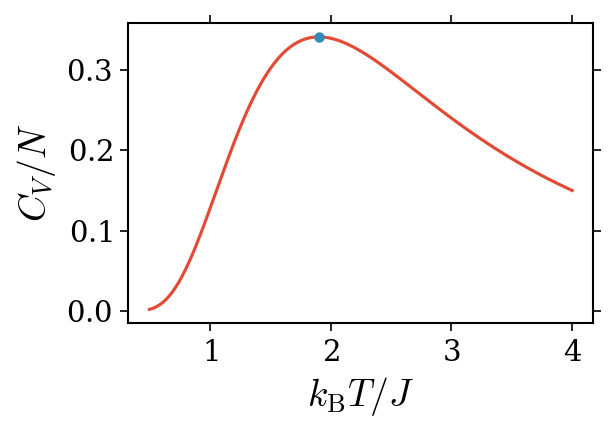

p-1.5_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42473926
Temp. at C_V max.: 2.0627748


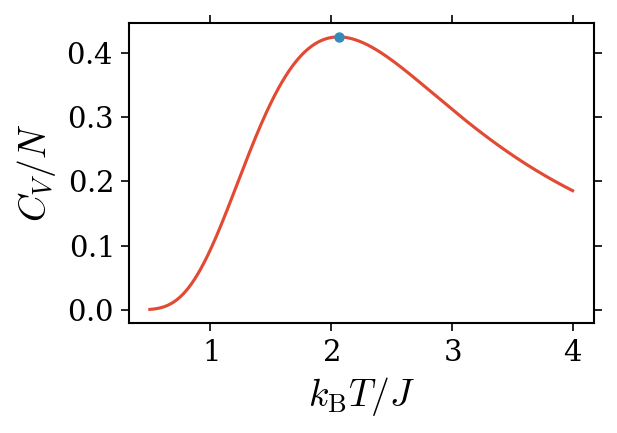

p-1.5_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.48825725
Temp. at C_V max.: 2.1807523


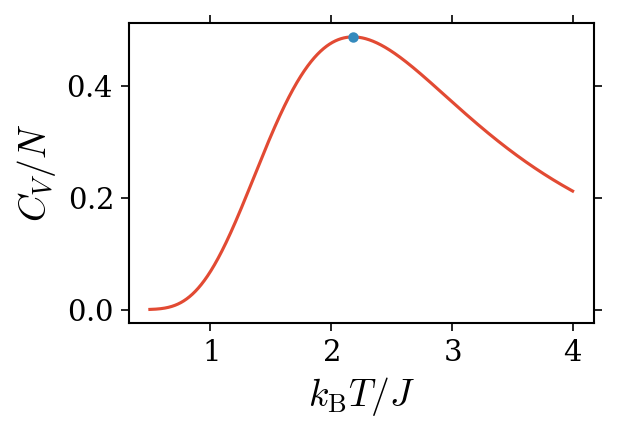

p-1.5_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.53942292
Temp. at C_V max.: 2.2747924


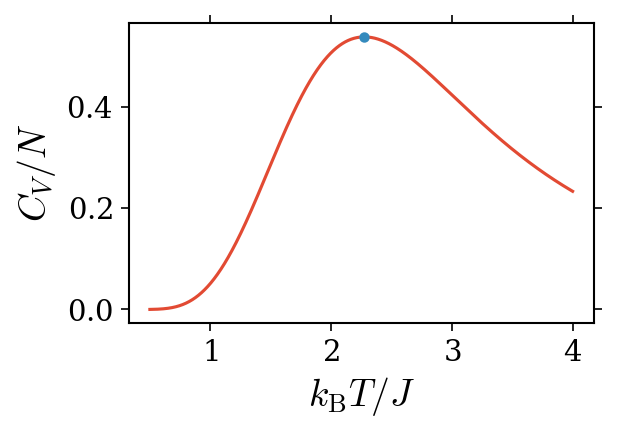

p-1.5_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.58223385
Temp. at C_V max.: 2.3534441


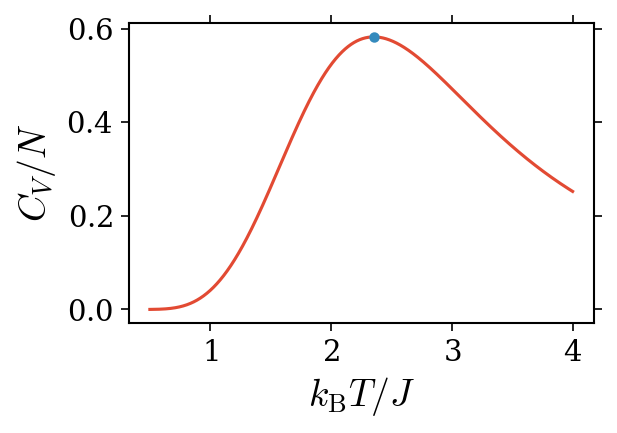

p-1.5_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.61902217
Temp. at C_V max.: 2.420127


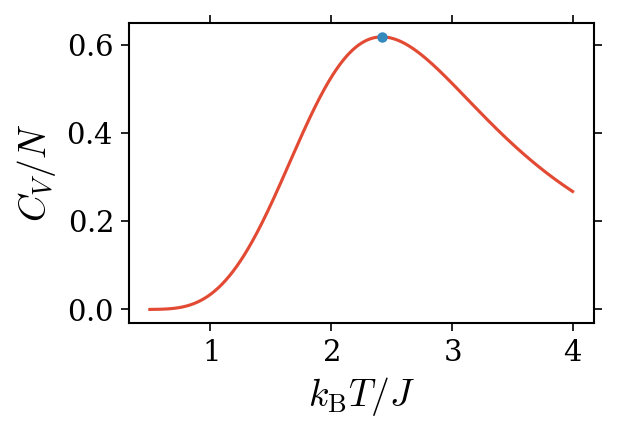

p-1.5_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.65126509
Temp. at C_V max.: 2.4782609


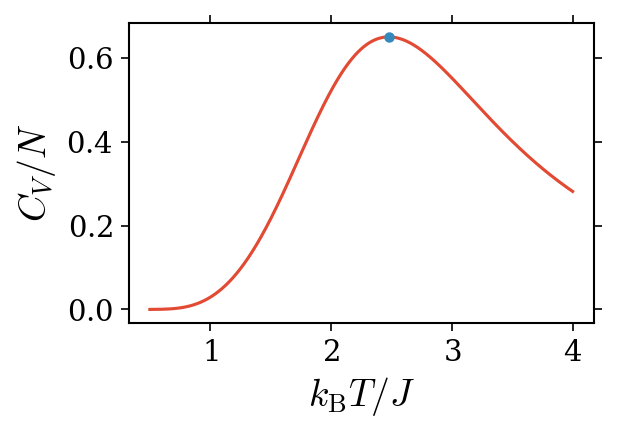

p-1.5_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.67995698
Temp. at C_V max.: 2.5278456


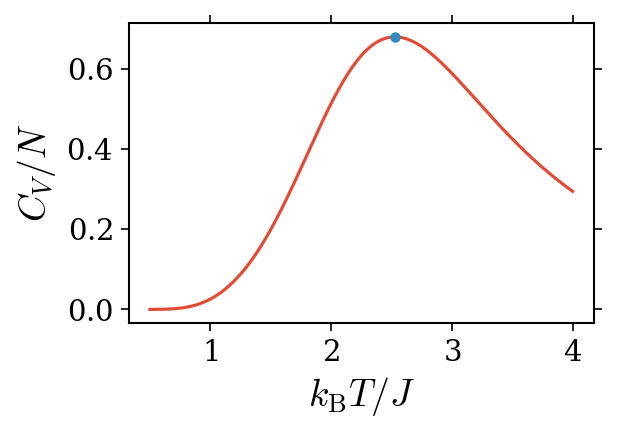

p-1.5_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.70579768
Temp. at C_V max.: 2.573341


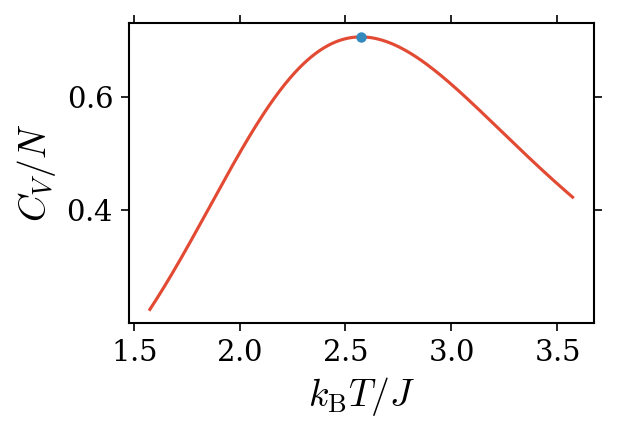

p-1.5_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\p-1.5_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.72929867
Temp. at C_V max.: 2.6145063


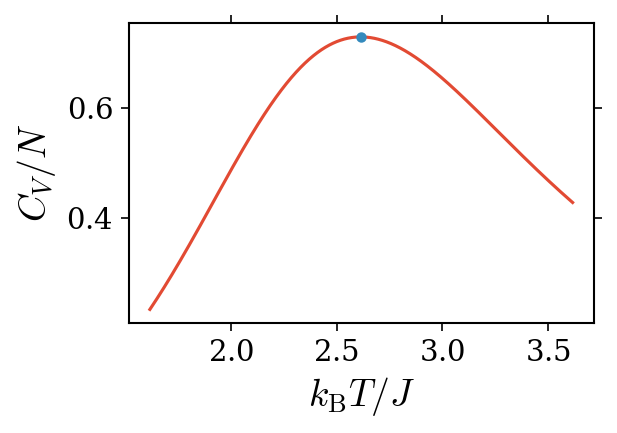

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.5\exp_p-1.5_all_eigs_max_cv.csv
p-1.6_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


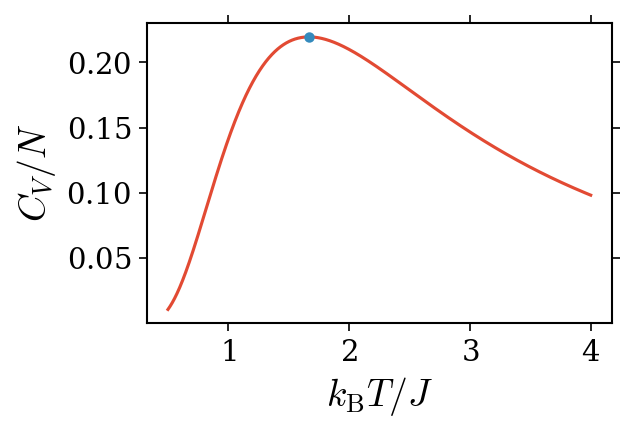

p-1.6_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.34116351
Temp. at C_V max.: 1.8695652


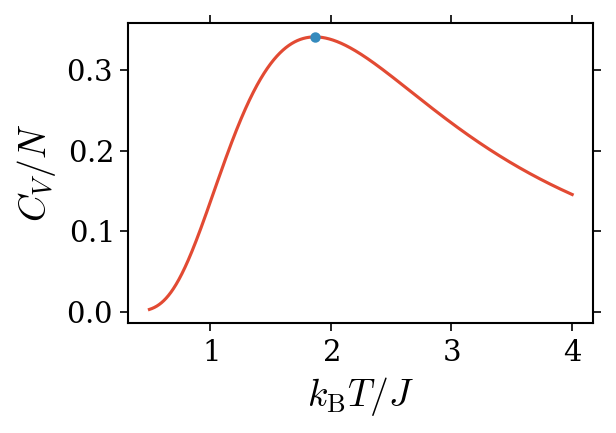

p-1.6_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42446679
Temp. at C_V max.: 2.0012213


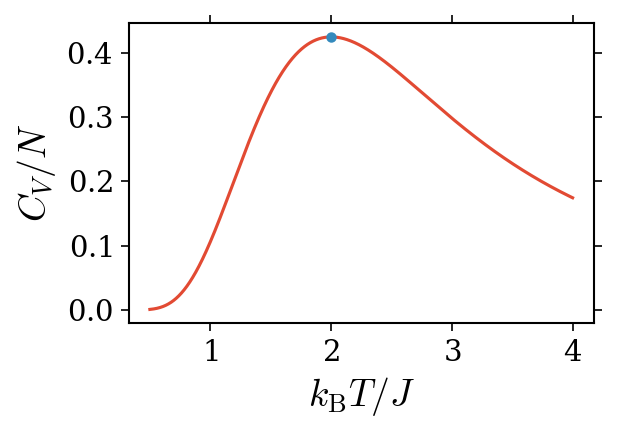

p-1.6_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.48754973
Temp. at C_V max.: 2.0969712


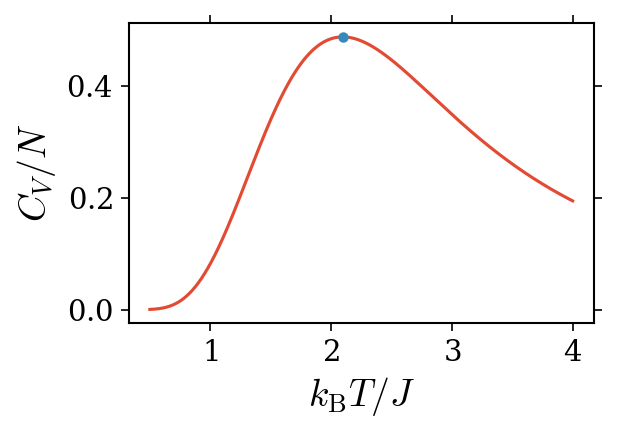

p-1.6_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.53819704
Temp. at C_V max.: 2.1704934


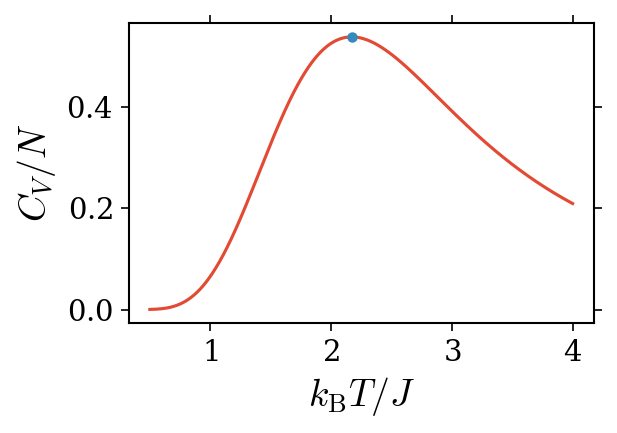

p-1.6_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.58045106
Temp. at C_V max.: 2.2320469


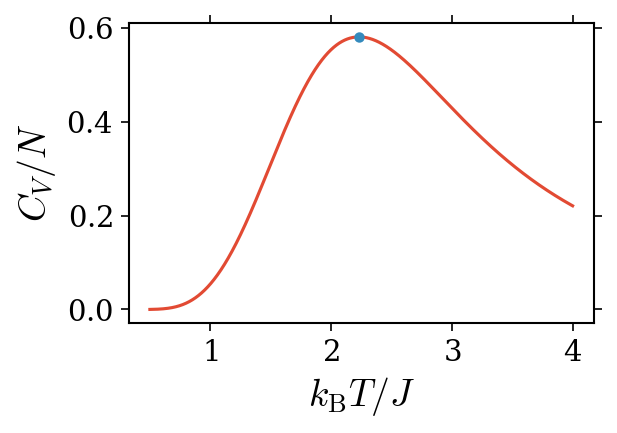

p-1.6_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.61667113
Temp. at C_V max.: 2.2816317


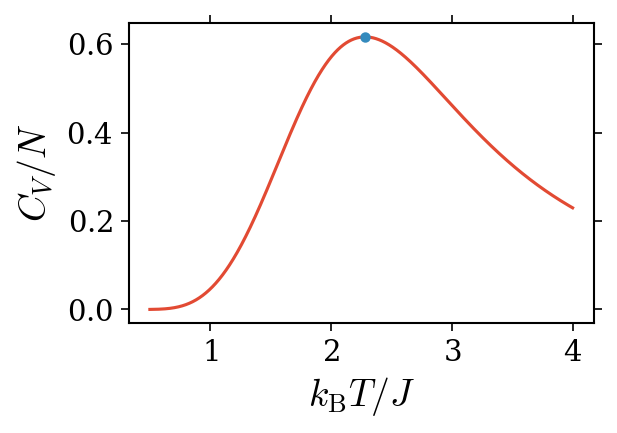

p-1.6_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.64834844
Temp. at C_V max.: 2.3243771


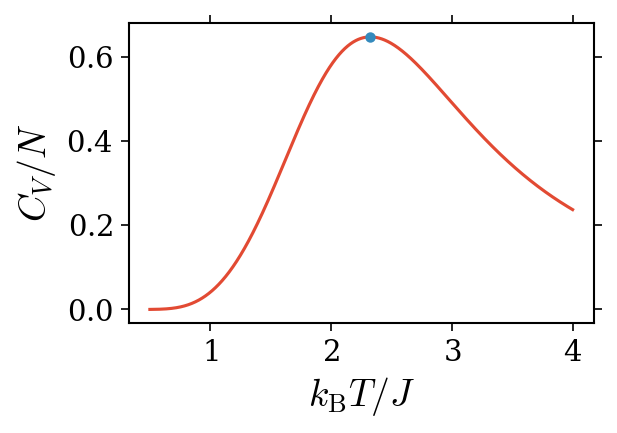

p-1.6_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.67648609
Temp. at C_V max.: 2.363703


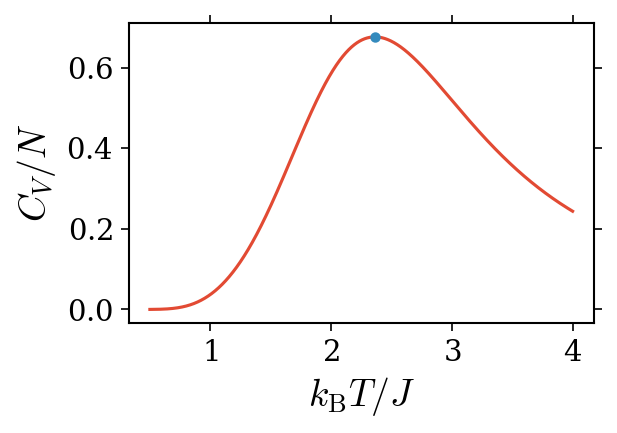

p-1.6_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.70178937
Temp. at C_V max.: 2.3958367


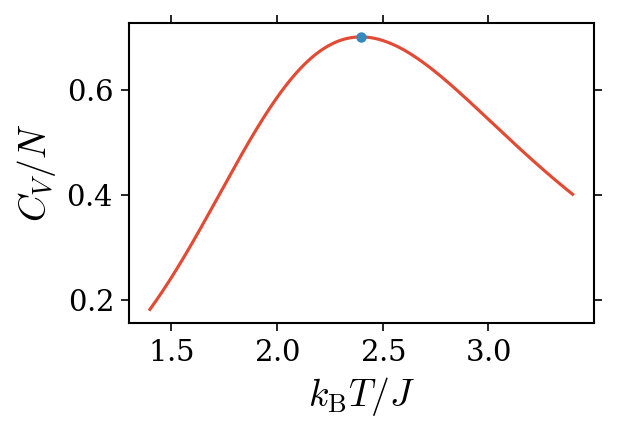

p-1.6_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\p-1.6_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.72477173
Temp. at C_V max.: 2.4258846


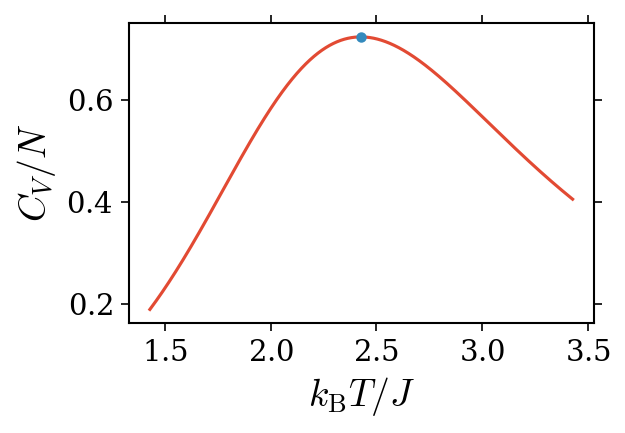

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.6\exp_p-1.6_all_eigs_max_cv.csv
p-1.7_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


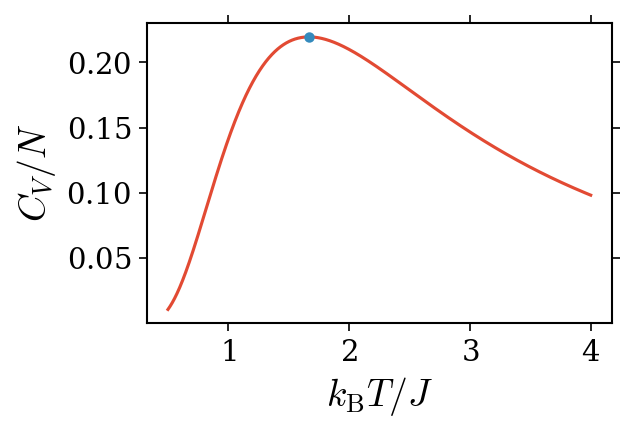

p-1.7_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.34116352
Temp. at C_V max.: 1.8387885


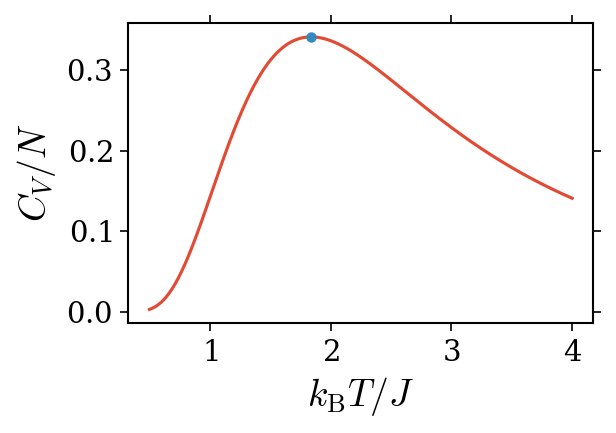

p-1.7_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42418044
Temp. at C_V max.: 1.9447973


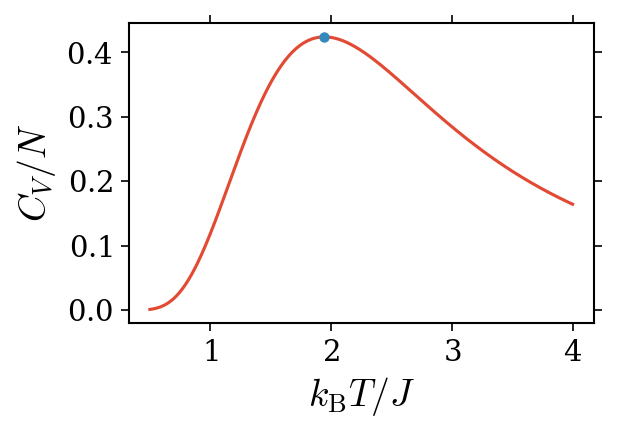

p-1.7_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.48679372
Temp. at C_V max.: 2.0200293


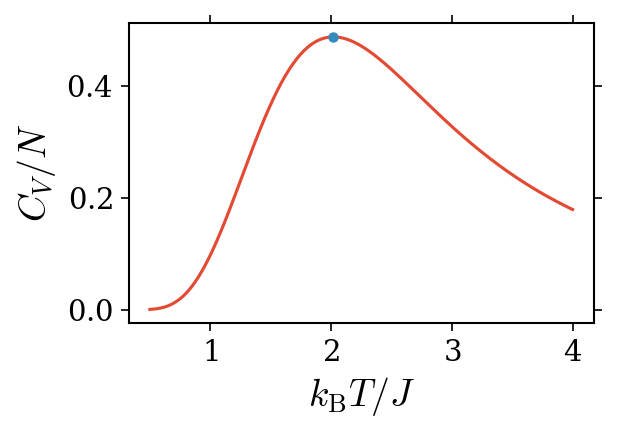

p-1.7_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.53686656
Temp. at C_V max.: 2.0764533


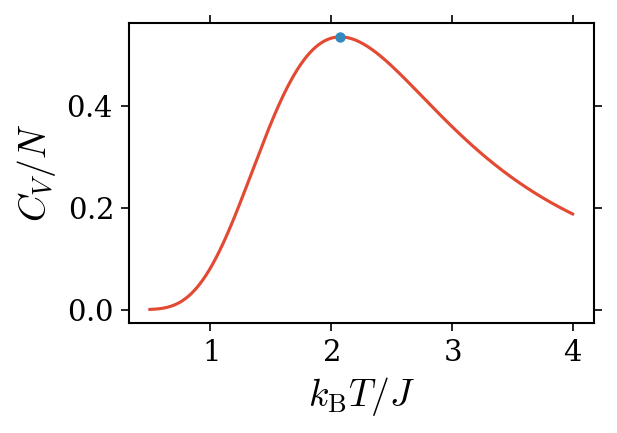

p-1.7_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.57848904
Temp. at C_V max.: 2.1209086


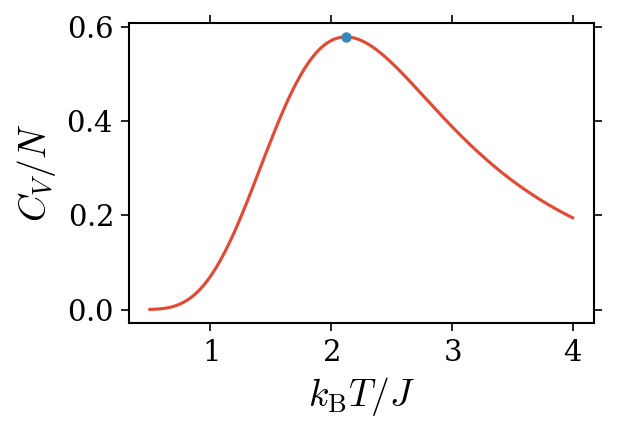

p-1.7_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.61404898
Temp. at C_V max.: 2.1585247


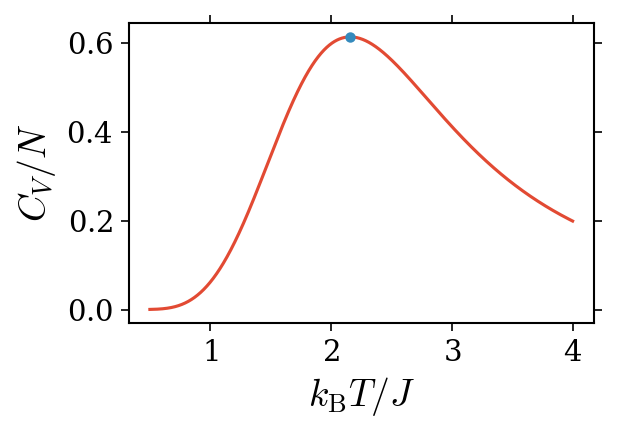

p-1.7_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.64505551
Temp. at C_V max.: 2.1893014


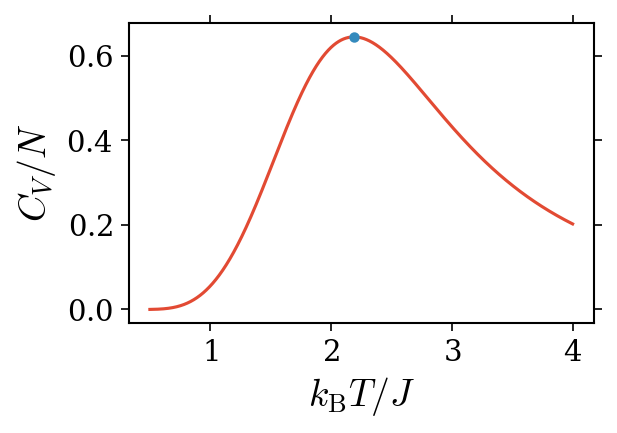

p-1.7_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.67252242
Temp. at C_V max.: 2.2166585


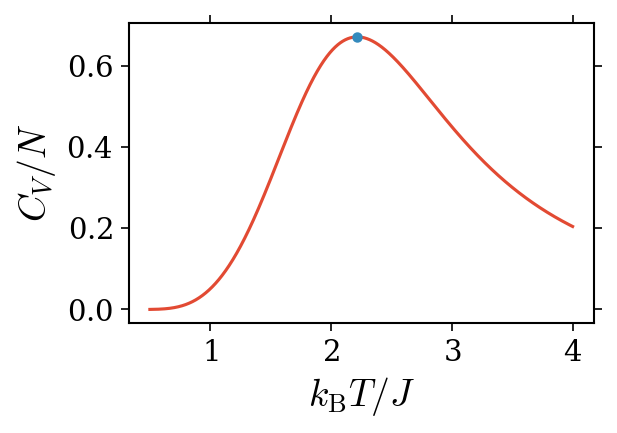

p-1.7_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.69716094
Temp. at C_V max.: 2.2398392


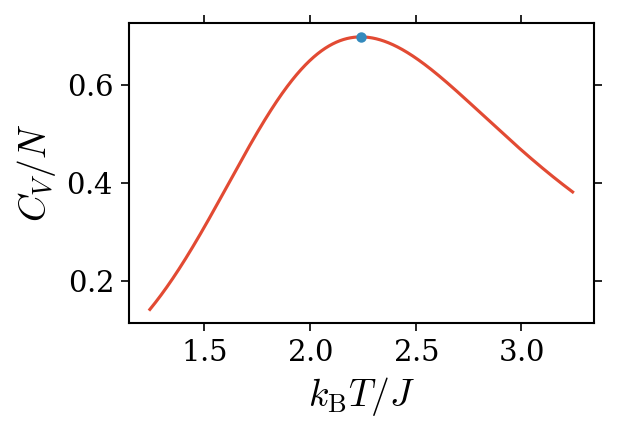

p-1.7_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\p-1.7_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.71948972
Temp. at C_V max.: 2.2610175


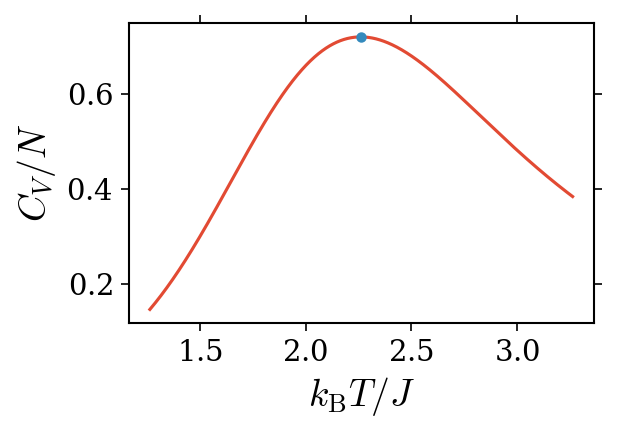

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.7\exp_p-1.7_all_eigs_max_cv.csv
p-1.8_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


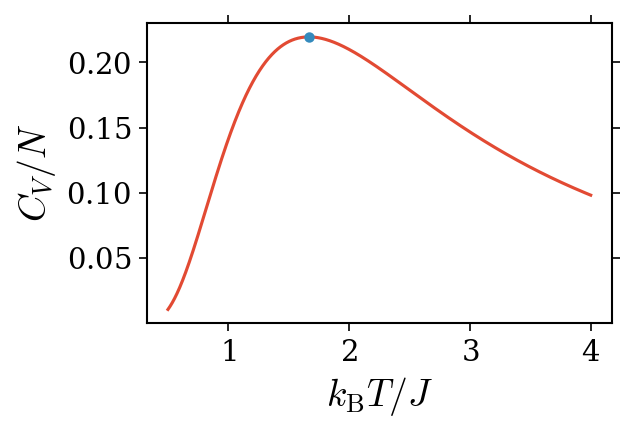

p-1.8_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.34116352
Temp. at C_V max.: 1.8097215


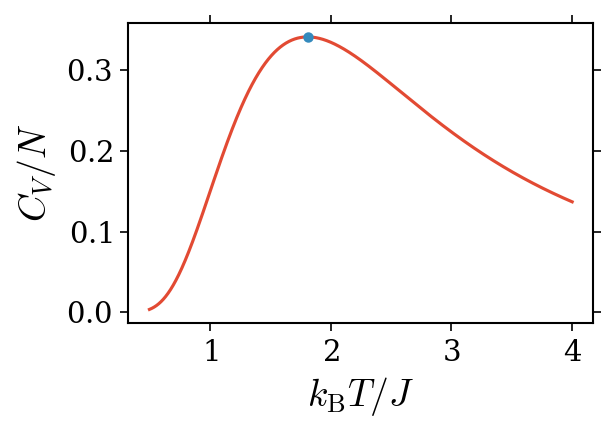

p-1.8_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42388276
Temp. at C_V max.: 1.8935027


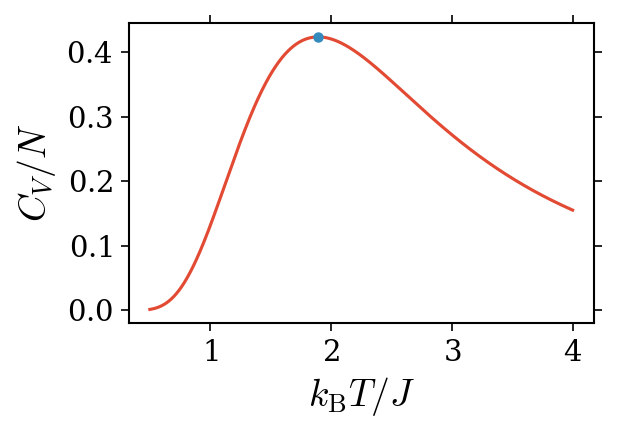

p-1.8_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.48599566
Temp. at C_V max.: 1.9499267


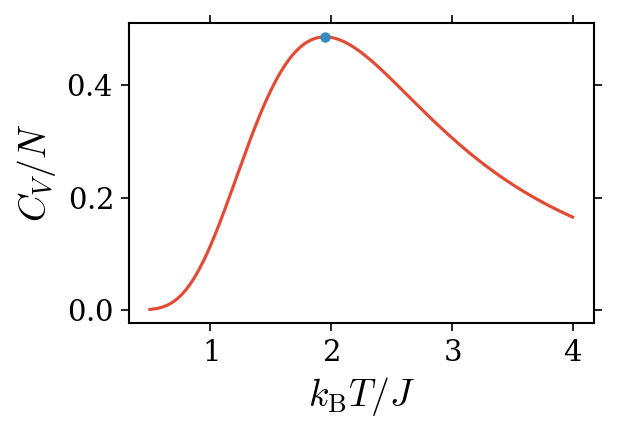

p-1.8_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.53544272
Temp. at C_V max.: 1.9909624


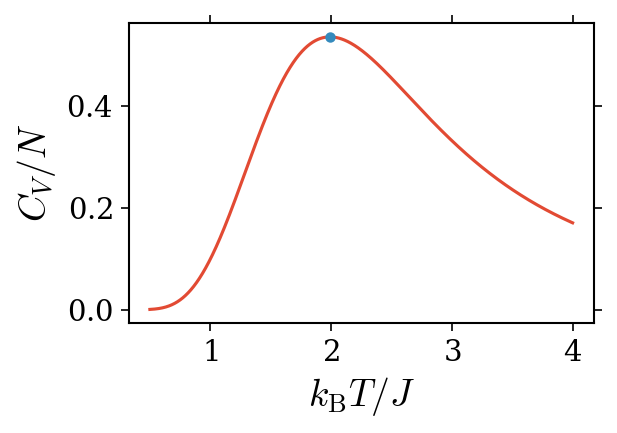

p-1.8_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.57636316
Temp. at C_V max.: 2.0234489


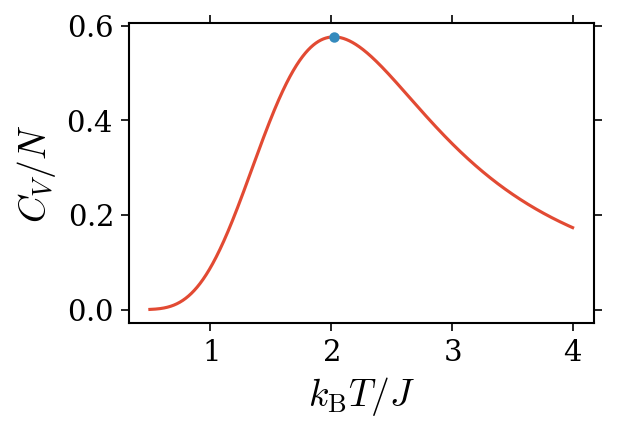

p-1.8_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.61117575
Temp. at C_V max.: 2.0490962


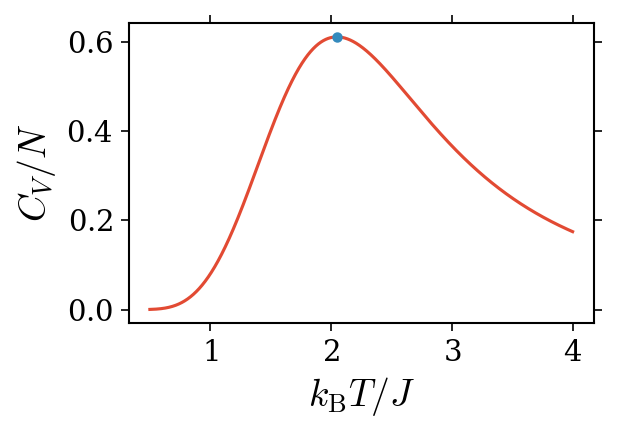

p-1.8_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.64141033
Temp. at C_V max.: 2.0696141


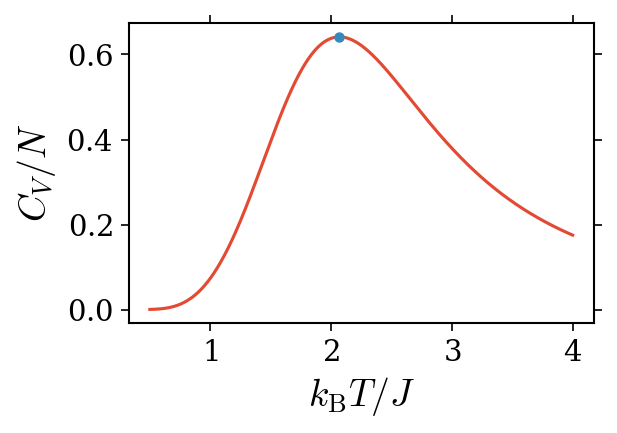

p-1.8_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.66809187
Temp. at C_V max.: 2.0867123


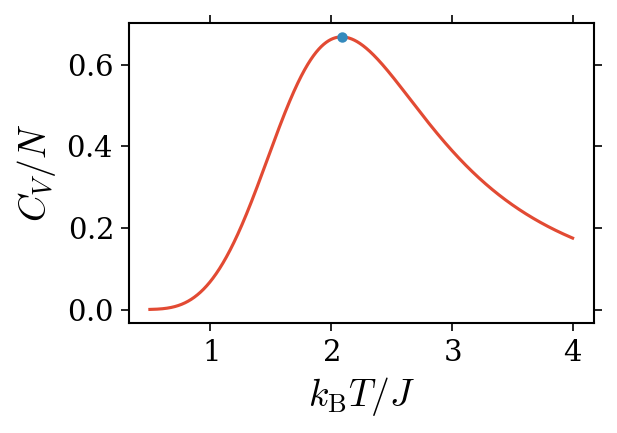

p-1.8_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.69194151
Temp. at C_V max.: 2.1029398


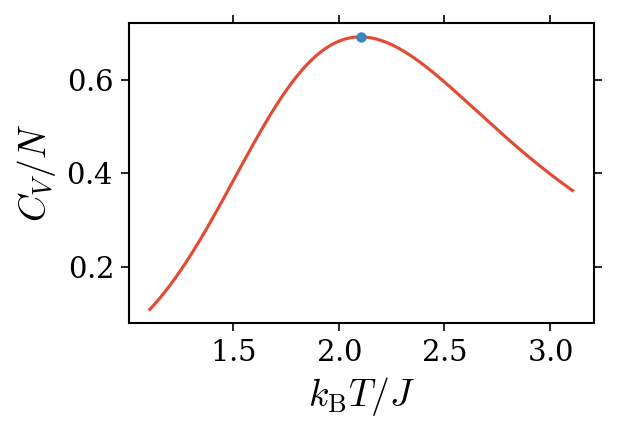

p-1.8_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\p-1.8_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.71348284
Temp. at C_V max.: 2.116219


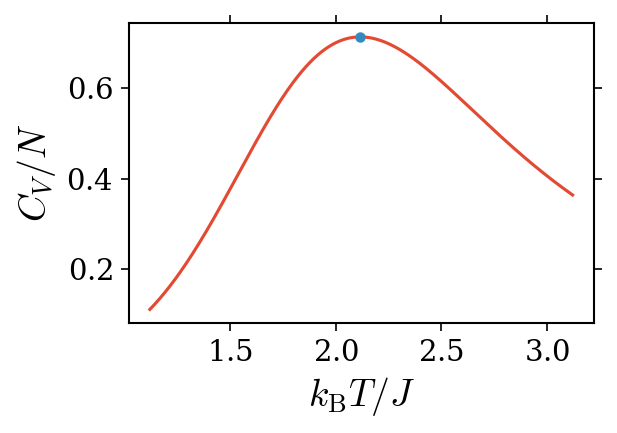

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.8\exp_p-1.8_all_eigs_max_cv.csv
p-1.9_nv-2_h-0_eig-4.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-2_h-0_eig-4.free-energy.h5
C_V max.: 0.21961437
Temp. at C_V max.: 1.6678065


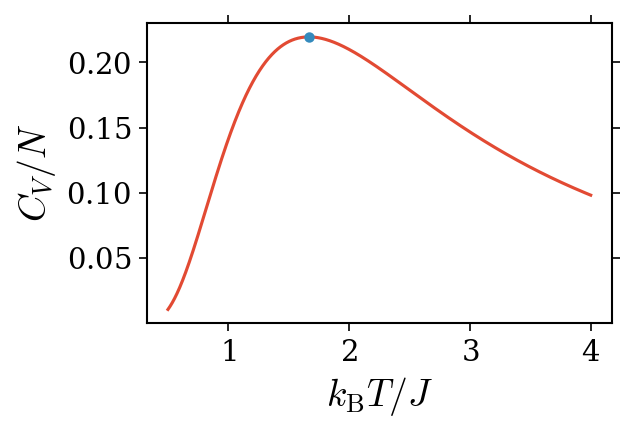

p-1.9_nv-3_h-0_eig-8.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-3_h-0_eig-8.free-energy.h5
C_V max.: 0.34116352
Temp. at C_V max.: 1.7826087


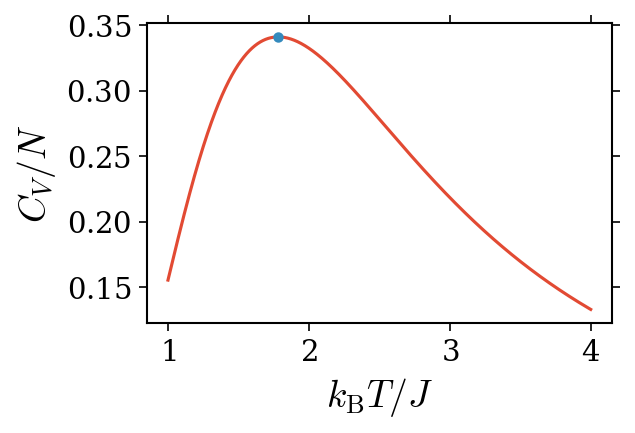

p-1.9_nv-4_h-0_eig-16.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-4_h-0_eig-16.free-energy.h5
C_V max.: 0.42357621
Temp. at C_V max.: 1.8456277


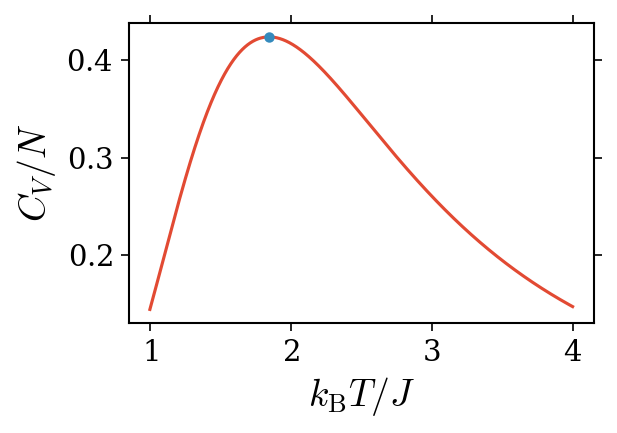

p-1.9_nv-5_h-0_eig-32.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-5_h-0_eig-32.free-energy.h5
C_V max.: 0.48516259
Temp. at C_V max.: 1.8851979


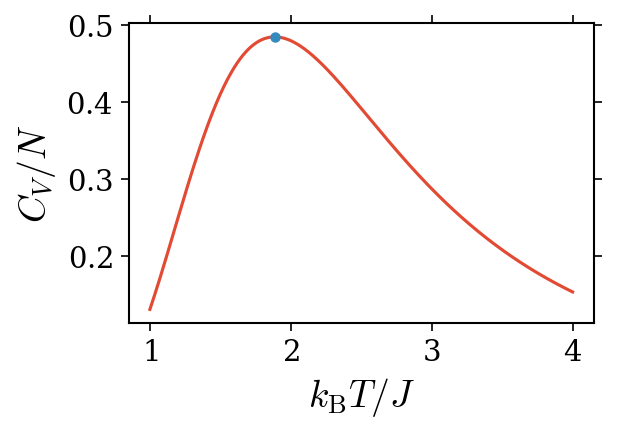

p-1.9_nv-6_h-0_eig-64.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-6_h-0_eig-64.free-energy.h5
C_V max.: 0.53393878
Temp. at C_V max.: 1.9130435


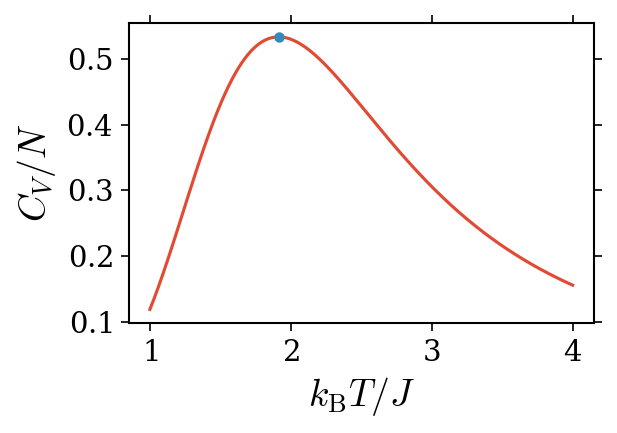

p-1.9_nv-7_h-0_eig-128.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-7_h-0_eig-128.free-energy.h5
C_V max.: 0.57409454
Temp. at C_V max.: 1.9335613


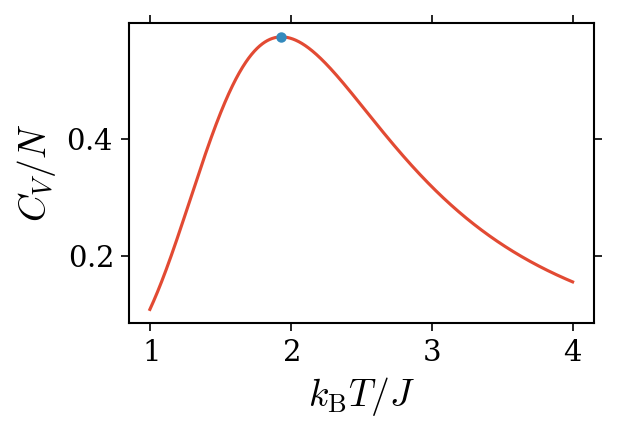

p-1.9_nv-8_h-0_eig-256.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-8_h-0_eig-256.free-energy.h5
C_V max.: 0.60808095
Temp. at C_V max.: 1.9496825


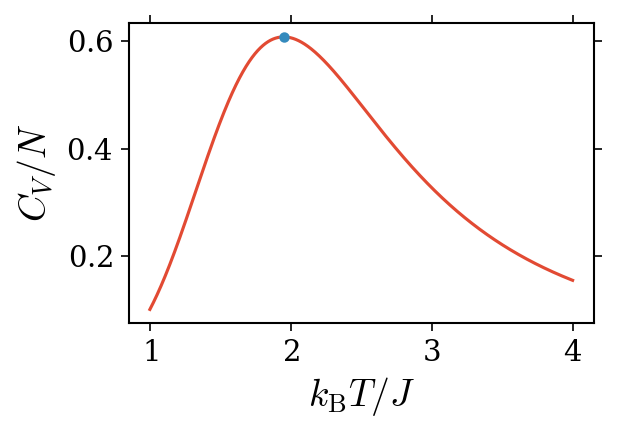

p-1.9_nv-9_h-0_eig-512.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-9_h-0_eig-512.free-energy.h5
C_V max.: 0.63731464
Temp. at C_V max.: 1.9614069


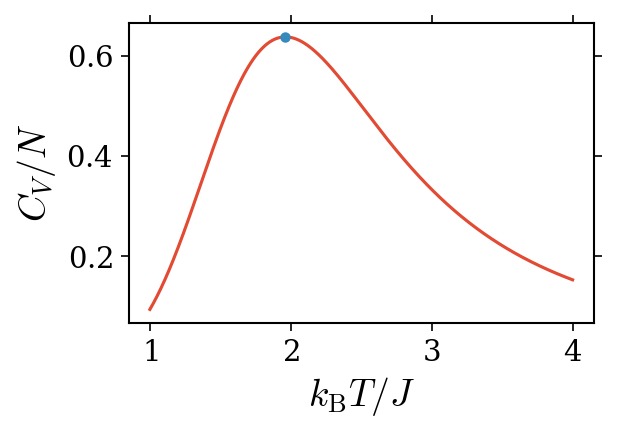

p-1.9_nv-10_h-0_eig-1024.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-10_h-0_eig-1024.free-energy.h5
C_V max.: 0.66321637
Temp. at C_V max.: 1.9716659


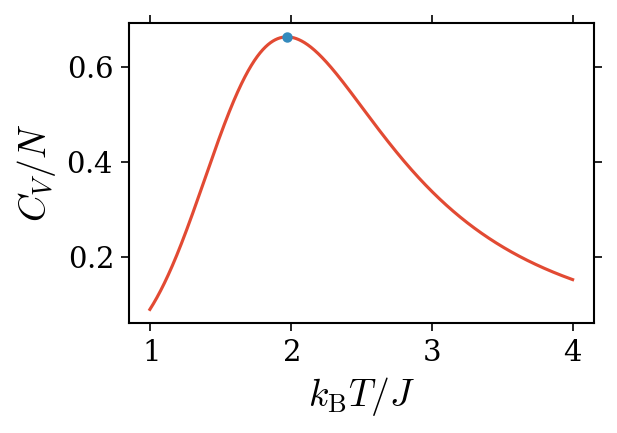

p-1.9_nv-11_h-0_eig-2048.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-11_h-0_eig-2048.free-energy.h5
C_V max.: 0.68618537
Temp. at C_V max.: 1.9803022


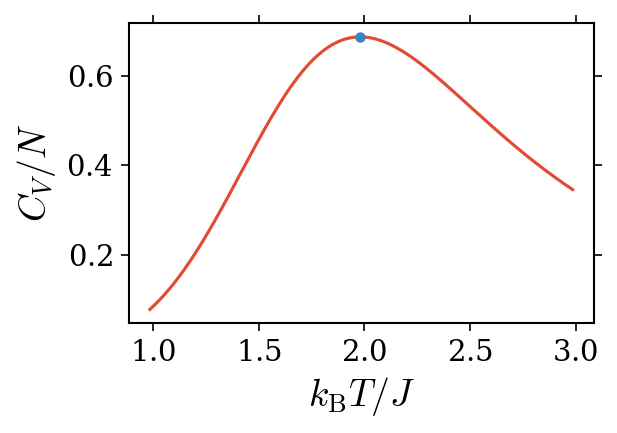

p-1.9_nv-12_h-0_eig-4096.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\p-1.9_nv-12_h-0_eig-4096.free-energy.h5
C_V max.: 0.7068144
Temp. at C_V max.: 1.9881359


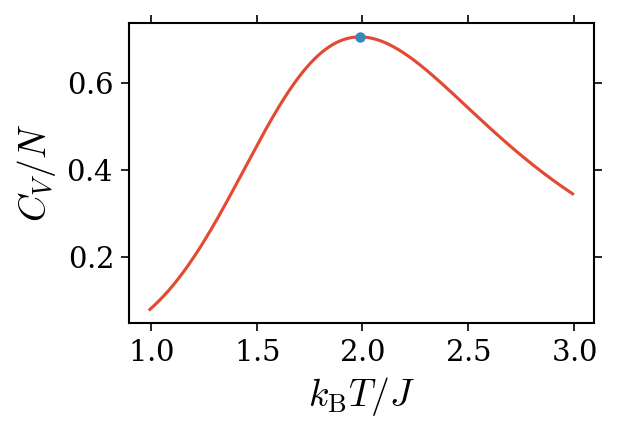

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\isingchat\venv\data\regular\finite-size\p_1.9\exp_p-1.9_all_eigs_max_cv.csv


In [5]:
list_exp_p = [1.0,1.05,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9]
list_nv = [2,3,4,5,6,7,8,9,10,11,12]
# list_nv = [12]
all_max_cv = {}
for exp_p in list_exp_p:
    all_max_cv[exp_p] = {}
    data_path = Path("../../data/regular/finite-size/p_{}".format(exp_p)).resolve()
    all_files = os.listdir(data_path)
    
    for nv in list_nv:
        try:
            file = 'p-{}_nv-{}_h-0_eig-{}.yml'.format(exp_p,nv,2**nv)
            config_file = Path(os.path.join(data_path,file)).resolve()
            energy_file = config_file.with_suffix(".free-energy.h5")
            print(file)
            print(energy_file)

            with config_file.open() as cfp:
                config_info = yaml.load(cfp)
            config_data = read_ising_config(config_info)

            with h5py.File(str(energy_file)) as h5fp:
                data_energy = h5fp["/free-energy"][()]

            temp = config_data["system"]["temperature"]
            mag_field = config_data["system"]["magnetic_field"]
            free_erg = data_energy[:, :]

            # Zero magnetic field spline
            free_erg_spl_zmf = interp.UnivariateSpline(temp,
                                                       free_erg[:, 0],
                                                       s=0, k=4)
            temp_fine = np.linspace(temp.min(), temp.max(), 2048)

            # Second derivative of the free energy.
            free_erg_der_spl_zmf = free_erg_spl_zmf.derivative(n=2)
            cv_fine = -temp_fine * free_erg_der_spl_zmf(temp_fine)
            cv_max_idx = np.argmax(cv_fine)
            temp_cv_max, cv_max = temp_fine[cv_max_idx], cv_fine[cv_max_idx]

            print(f"C_V max.: {cv_max:.8G}")
            print(f"Temp. at C_V max.: {temp_cv_max:.8G}")
            all_max_cv[exp_p][nv] = {
                'max_Cv': cv_max,
                'temp_at_max_Cv': temp_cv_max
            }

            use_tex = False

            # Load the default style.
            style.use("default")
            rcParams["text.usetex"] = use_tex

            fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
            grid_spec = GridSpec(3, 1)

            # Specific heat subplot.
            ax: Axes = fig1.add_subplot(grid_spec[0, 0])

            ax.plot(temp_fine, cv_fine, lw=1.5)
            ax.plot(temp_cv_max, cv_max, marker="o", lw=0)

            ax.set_xlabel(r"$k_\mathrm{B} T / J$")
            ax.set_ylabel(r"$C_V / N$")

            pyplot.draw()
            pyplot.show()
    
        except KeyError:
            print('error with this file {}'.format(file))

    # Export to pandas 
    print('Exporting data to {}'.format(os.path.join(data_path,'exp_p-{}_all_eigs_max_cv.csv'.format(exp_p))))
    df = pd.DataFrame(all_max_cv[exp_p])
    df.loc['inv_temp_at_max_Cv'] = 1/df.loc['temp_at_max_Cv']
    df = df.reindex(sorted(df.columns), axis=1)
    df.to_csv(os.path.join(data_path,'exp_p-{}_all_eigs_max_cv.csv'.format(exp_p)))

In [3]:
all_max_cv

{2.0: {2: {'max_Cv': 0.219614365322383, 'temp_at_max_Cv': 1.6678065461651197},
  3: {'max_Cv': 0.34116339004252316, 'temp_at_max_Cv': 1.7567171470444554},
  4: {'max_Cv': 0.42326302318208864, 'temp_at_max_Cv': 1.801172447484123},
  5: {'max_Cv': 0.4843018496714711, 'temp_at_max_Cv': 1.8268197361993161},
  6: {'max_Cv': 0.5323690148890966, 'temp_at_max_Cv': 1.8422081094284317},
  7: {'max_Cv': 0.5717058780090452, 'temp_at_max_Cv': 1.8541768441621884},
  8: {'max_Cv': 0.6047979433264006, 'temp_at_max_Cv': 1.8610161211529066},
  9: {'max_Cv': 0.6331081309149106, 'temp_at_max_Cv': 1.8661455788959453},
  10: {'max_Cv': 0.6580108282052499, 'temp_at_max_Cv': 1.8695652173913042},
  11: {'max_Cv': 0.6799677342812268, 'temp_at_max_Cv': 1.87223961969083},
  12: {'max_Cv': 0.6995758969027192, 'temp_at_max_Cv': 1.8740065161830979}}}

In [6]:
df_exp = df.reindex(sorted(df.columns), axis=1)

In [5]:
de_exp

NameError: name 'de_exp' is not defined

In [8]:
df_exp.to_csv(os.path.join(data_path,'alpha-{}_max_cv.csv'.format(alpha)))

### Insert all max_cv to json 

In [27]:
import json
with open("../../../data/all_max_cv.json", "w") as outfile: 
    print('Save {}'.format(outfile.name))
    json.dump(all_max_cv, outfile,indent=4)

Save ../../data/all_max_cv.json


### import to csv

In [4]:
import pandas as pd
df = pd.DataFrame(all_max_cv[1.1])

In [7]:
df.head()

2         3         4         5         6         7
max_Cv             0.545464  0.636133  0.709688  0.771033  0.823491  0.869223
temp_at_max_Cv     1.469946  1.892921  2.218437  2.485476  2.713532  2.914299
Inv_temp_at_mx_Cv  0.680297  0.528284  0.450768  0.402337  0.368523  0.343136

In [6]:
df.loc['Inv_temp_at_mx_Cv'] = 1/df.loc['temp_at_max_Cv']

In [10]:
df.to_csv('../../../data/alpha_1.1/max_cv.csv')

In [16]:
example_string = "alpha-1.1_nv-2_h-0.yml"
sub_string = re.search('alpha-{}_nv-(.+?)_h-0.yml'.format(1.1), example_string)
if sub_string:
    found = sub_string.group(1)
    print(type(found))


<class 'str'>


In [3]:
import json
# Read all_max_cv.json
with open("../../../data/all_max_cv.json") as json_file:
    all_mx_cv = json.load(json_file)

In [10]:
import os
os.getcwd()
print('{}'.format(alpha))

1.0


### Obtain individual graph

In [3]:
alpha = 1.1
nv = 20
# Read all_max_cv.json
with open("../../../data/all_max_cv.json") as json_file:
    all_max_cv = json.load(json_file)
all_max_cv[alpha] = {}

alpha-1.1_nv-20_h-0_v2.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\alpha_1.1\alpha-1.1_nv-20_h-0_v2.free-energy.h5
C_V max.: 1.1967924
Temp. at C_V max.: 4.4349047


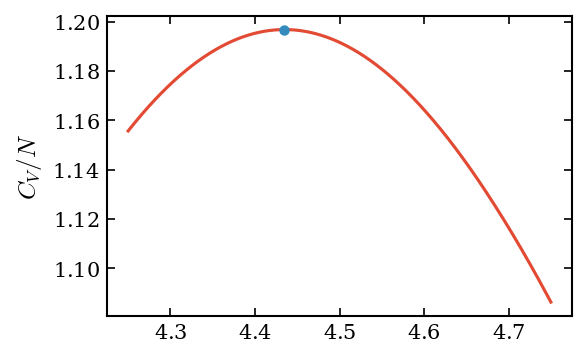

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\alpha_1.1\max_cv.csv


In [5]:
data_path = Path("../../../data/alpha_{}".format(alpha)).resolve()
file = 'alpha-{}_nv-{}_h-0_v2.yml'.format(alpha,nv)

config_file = Path(os.path.join(data_path,file)).resolve()
energy_file = config_file.with_suffix(".free-energy.h5")
print(file)
print(energy_file)

with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

with h5py.File(str(energy_file)) as h5fp:
    data_energy = h5fp["/free-energy"][()]

temp = config_data["system"]["temperature"]
mag_field = config_data["system"]["magnetic_field"]
free_erg = data_energy[:, :]

# Zero magnetic field spline
free_erg_spl_zmf = interp.UnivariateSpline(temp,
                                           free_erg[:, 0],
                                           s=0, k=4)
temp_fine = np.linspace(temp.min(), temp.max(), 2048)

# Second derivative of the free energy.
free_erg_der_spl_zmf = free_erg_spl_zmf.derivative(n=2)
cv_fine = -temp_fine * free_erg_der_spl_zmf(temp_fine)
cv_max_idx = np.argmax(cv_fine)
temp_cv_max, cv_max = temp_fine[cv_max_idx], cv_fine[cv_max_idx]

print(f"C_V max.: {cv_max:.8G}")
print(f"Temp. at C_V max.: {temp_cv_max:.8G}")
all_max_cv[alpha][nv] = {
    'max_Cv': cv_max,
    'temp_at_max_Cv': temp_cv_max
}

use_tex = False

# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(temp_fine, cv_fine, lw=1.5)
ax.plot(temp_cv_max, cv_max, marker="o", lw=0)

# ax.set_xlabel(r"$k_\mathrm{B} T / J$")
ax.set_ylabel(r"$C_V / N$")

pyplot.draw()
pyplot.show()

# Read csv in pandas
try:
    df = pd.read_csv(os.path.join(data_path,'alpha-{}_max_cv.csv'.format(alpha)),index_col=0)
    df.rename(index = {'inv_temp_at_mx_Cv':'inv_temp_at_max_Cv'},inplace=True)
except FileNotFoundError:
    df = pd.DataFrame()
# Export to pandas 
print('Exporting data to {}'.format(os.path.join(data_path,'max_cv.csv')))
insert_data = all_max_cv[alpha][nv]
insert_data['inv_temp_at_max_Cv'] = 1/insert_data['temp_at_max_Cv']
if nv not in df.columns.astype(int):
    df[nv] = pd.Series(insert_data)
    df.to_csv(os.path.join(data_path,'alpha-{}_max_cv.csv'.format(alpha)))


In [5]:
all_max_cv

{'1.1': {'20': {'max_Cv': 1.0864967834346764,
   'temp_at_max_Cv': 4.75,
   'inv_temp_at_max_Cv': 0.21052631578947367}},
 '1.4': {'20': {'max_Cv': 1.0984148116153118,
   'temp_at_max_Cv': 3.05,
   'inv_temp_at_max_Cv': 0.3278688524590164}},
 1.6: {20: {'max_Cv': 1.0164804867918729,
   'temp_at_max_Cv': 2.463898387884709,
   'inv_temp_at_max_Cv': 0.4058608930129273}}}

In [12]:
with config_file.open() as cfp:
    config_info = yaml.load(cfp)
config_data = read_ising_config(config_info)

with h5py.File(str(energy_file)) as h5fp:
    data_energy = h5fp["/free-energy"][()]

temp = config_data["system"]["temperature"]
mag_field = config_data["system"]["magnetic_field"]
free_erg = data_energy[:, :]

print(mag_field)
print(free_erg)

[0.]
[[-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25      ]
 [-1.25000001]
 [-1.25000001]
 [-1.25000003]
 [-1.25000005]
 [-1.25000009]
 [-1.25000016]
 [-1.25000028]
 [-1.25000046]
 [-1.25000073]
 [-1.25000113]
 [-1.25000171]
 [-1.25000252]
 [-1.25000363]
 [-1.25000514]
 [-1.25000714]
 [-1.25000974]
 [-1.2500131 ]
 [-1.25001736]
 [-1.25002269]
 [-1.25002931]
 [-1.25003742]
 [-1.25004727]
 [-1.25005912]
 [-1.25007325]
 [-1.25008997]
 [-1.2501096 ]
 [-1.2501325 ]
 [-1.25015902]
 [-1.25018955]
 [-1.2502245 ]
 [-1.2502643 ]
 [-1.25030937]
 [-1.25036017]
 [-1.25041717]
 [-1.25048085]
 [-1.25055171]
 [-1.25063025]
 [-1.25071698]
 [-1.25081242]
 [-1.25091711]
 [-1.25103158]
 [-1.25115638]
 [-1.25129204]
 [-1.25143912]
 [-1.25159817]
 [-1.

### Get Specific heat

In [15]:
# Zero magnetic field spline
free_erg_spl_zmf = interp.UnivariateSpline(temp,
                                           free_erg[:, 0],
                                           s=0, k=4)
temp_fine = np.linspace(temp.min(), temp.max(), 2048)

# Second derivative of the free energy.
free_erg_der_spl_zmf = free_erg_spl_zmf.derivative(n=2)
cv_fine = -temp_fine * free_erg_der_spl_zmf(temp_fine)
cv_max_idx = np.argmax(cv_fine)
temp_cv_max, cv_max = temp_fine[cv_max_idx], cv_fine[cv_max_idx]

print(f"C_V max.: {cv_max:.8G}")
print(f"Temp. at C_V max.: {temp_cv_max:.8G}")


C_V max.: 0.50547844
Temp. at C_V max.: 1.1951099


### Plots

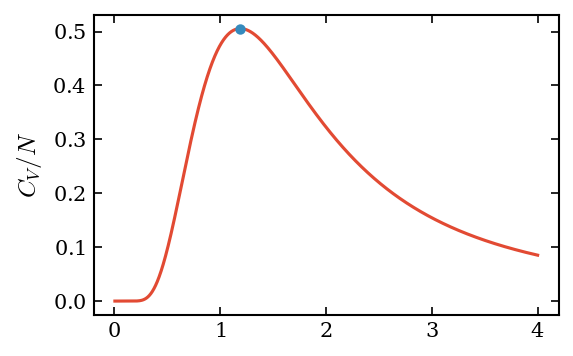

In [16]:
use_tex = False

# Load the default style.
style.use("default")
rcParams["text.usetex"] = use_tex

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(temp_fine, cv_fine, lw=1.5)
ax.plot(temp_cv_max, cv_max, marker="o", lw=0)

# ax.set_xlabel(r"$k_\mathrm{B} T / J$")
ax.set_ylabel(r"$C_V / N$")

pyplot.draw()
pyplot.show()


In [4]:
1/np.arange(1,26,1)

array([1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
       0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
       0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
       0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ,
       0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ])